In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Predict student performance.xlsx to Predict student performance (1).xlsx


In [28]:
data= pd.read_excel('Predict student performance.xlsx')
data.head()

school sex  age address famsize pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [29]:
print(data)

    school sex  age address famsize pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [30]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [32]:
data.shape

(395, 33)

In [33]:
data.shape[1]

33

In [34]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

['GP' 'MS']
school
GP    349
MS     46
Name: count, dtype: int64
['F' 'M']
sex
F    208
M    187
Name: count, dtype: int64
[18 17 15 16 19 22 20 21]
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
['U' 'R']
address
U    307
R     88
Name: count, dtype: int64
['GT3' 'LE3']
famsize
GT3    281
LE3    114
Name: count, dtype: int64
['A' 'T']
pstatus
T    354
A     41
Name: count, dtype: int64
[4 1 3 2 0]
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
[4 1 2 3 0]
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher']
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
['teacher' 'other' 'services' 'health' 'at_home']
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
['course' 'other' 'home' 'reputation']
reason
cou

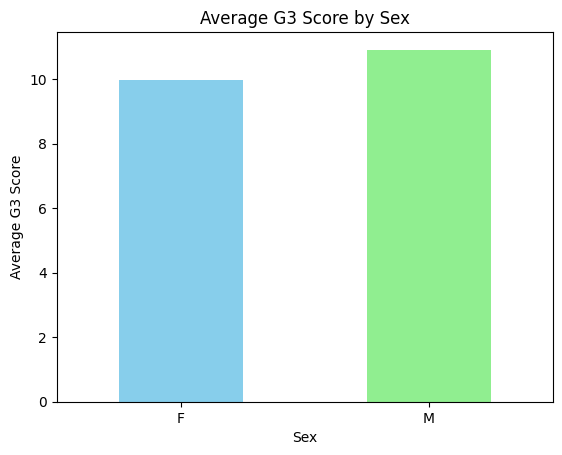

In [35]:
# Group the data by 'sex' and calculate the mean of 'G3'
sex_g3_avg = data.groupby('sex')['G3'].mean()

sex_g3_avg.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average G3 Score by Sex')
plt.xlabel('Sex')
plt.ylabel('Average G3 Score')
plt.xticks(rotation=0)
plt.show()

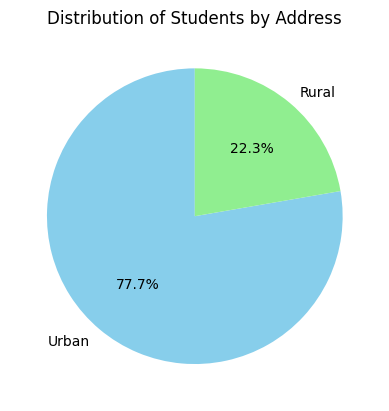

In [36]:
address_counts = data['address'].value_counts()
address_labels = ['Urban', 'Rural']
address_counts.plot(kind='pie', labels=address_labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')
plt.title('Distribution of Students by Address')
plt.show()

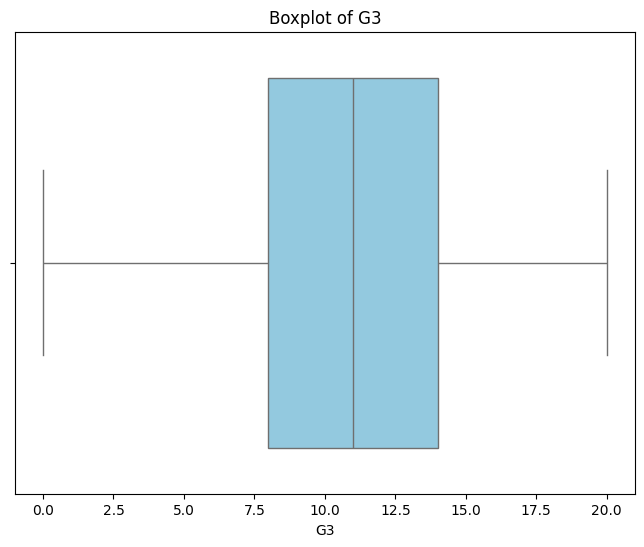

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['G3'], color='skyblue')
plt.xlabel('G3')
plt.title('Boxplot of G3')
plt.show()

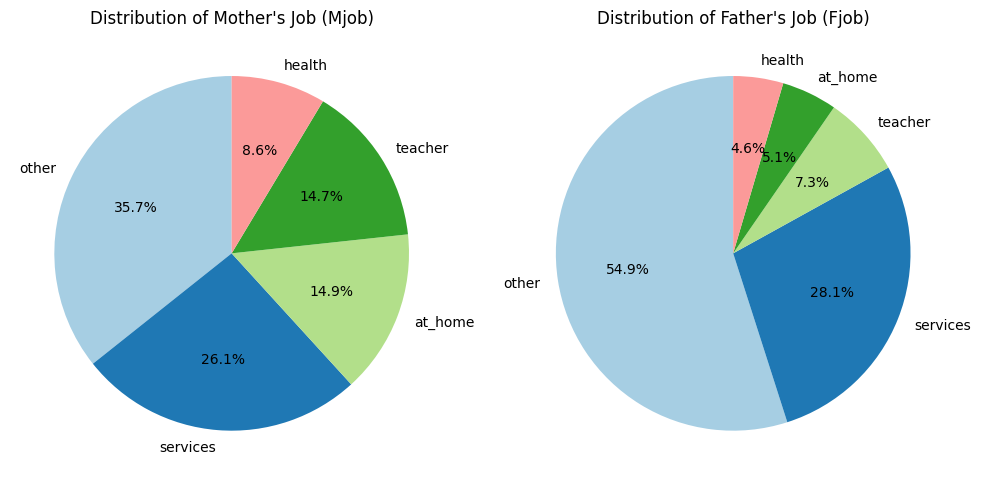

In [ ]:
plt.figure(figsize=(10, 5))

# Get value counts for the 'Mjob' column
mjob_counts = data['Mjob'].value_counts()

# Create the pie chart for Mjob
plt.subplot(1, 2, 1)
mjob_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title('Distribution of Mother\'s Job (Mjob)')

# Plot for the Fjob column (Father's job)
# Get value counts for the 'Fjob' column
fjob_counts = data['Fjob'].value_counts()

# Create the pie chart for Fjob
plt.subplot(1, 2, 2)
fjob_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title('Distribution of Father\'s Job (Fjob)')

# Display the plots
plt.tight_layout()
plt.show()

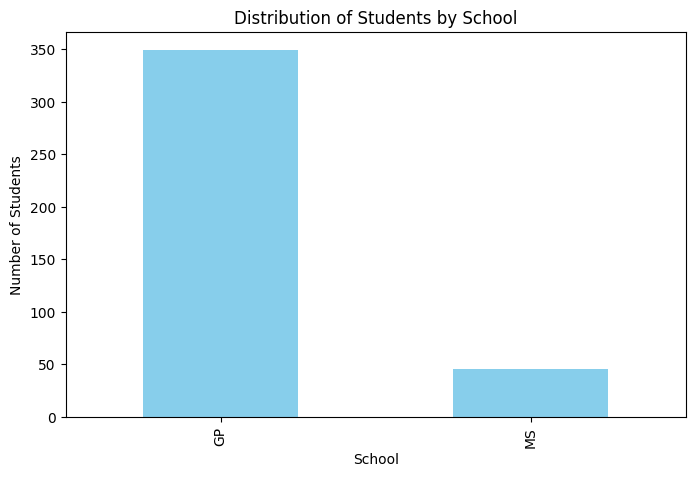

In [ ]:
school_counts = data['school'].value_counts()

# Create a histogram (bar chart) for the 'school' column
plt.figure(figsize=(8, 5))
school_counts.plot(kind='bar', color='skyblue')

# Set the title and labels
plt.title('Distribution of Students by School')
plt.xlabel('School')
plt.ylabel('Number of Students')

# Display the plot
plt.show()

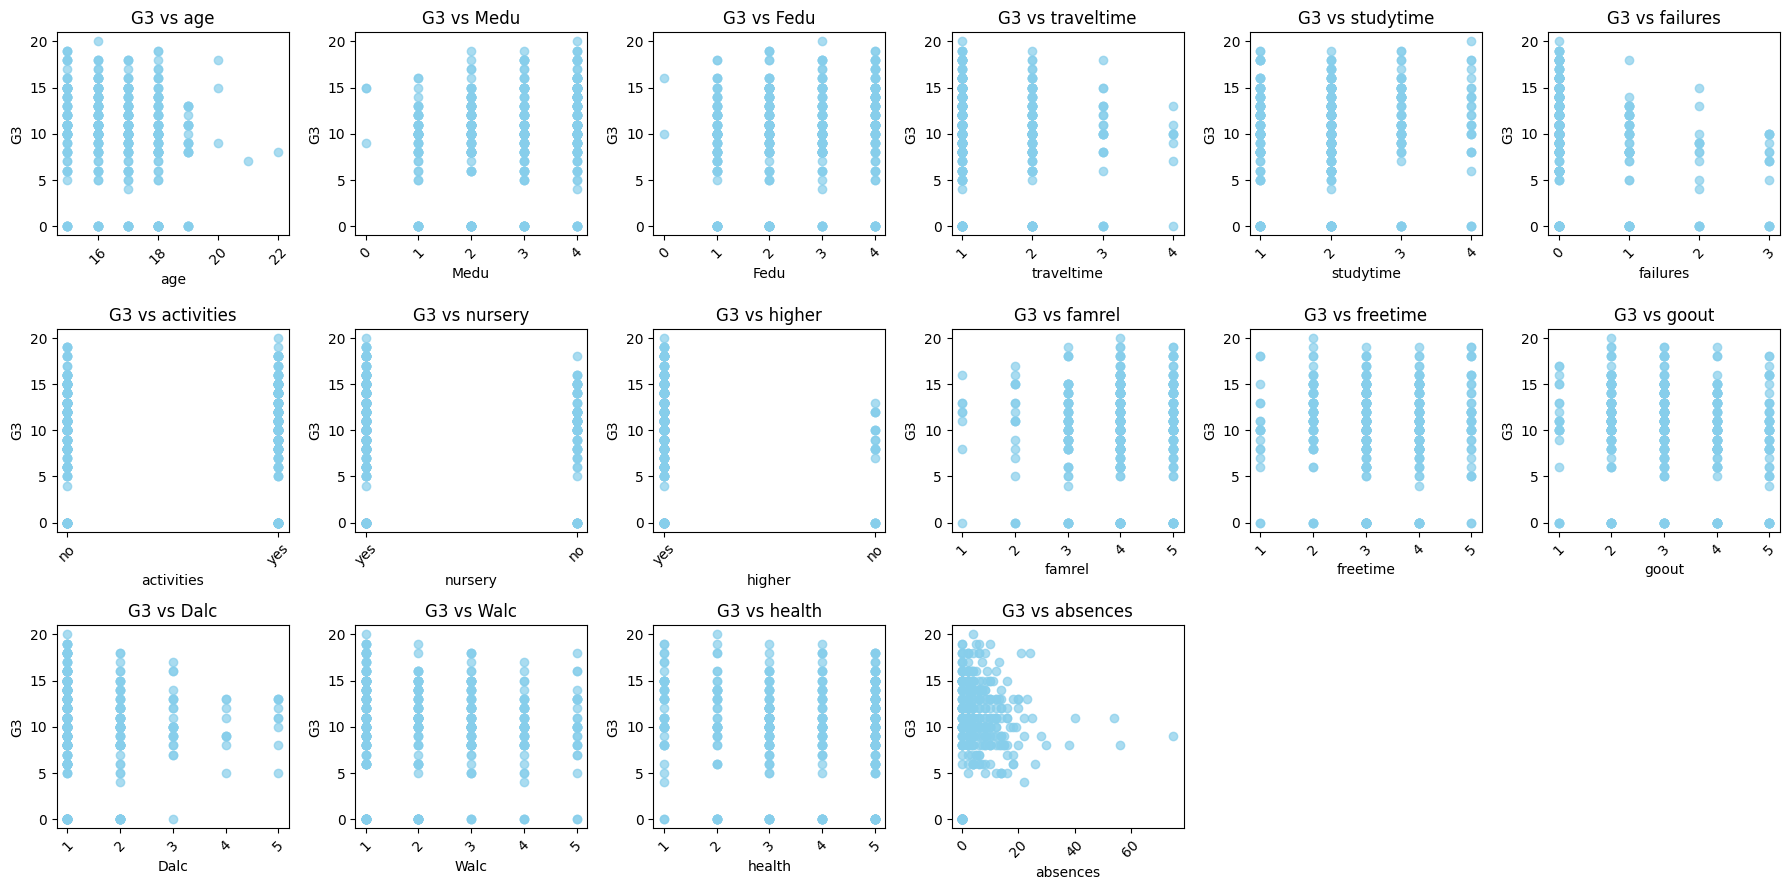

In [ ]:
columns_to_plot = [
    'age', 'Medu', 'Fedu',
    'traveltime', 'studytime', 'failures',
    'activities', 'nursery', 'higher', 'famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
]

# Create subplots
num_plots = len(columns_to_plot)
n_rows = (num_plots + 5) // 6  # Calculate the number of rows needed
plt.figure(figsize=(18, 3 * n_rows))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, 6, i)  # Adjust grid size as needed
    plt.scatter(data[col], data['G3'], color='skyblue', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('G3')
    plt.title(f'G3 vs {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

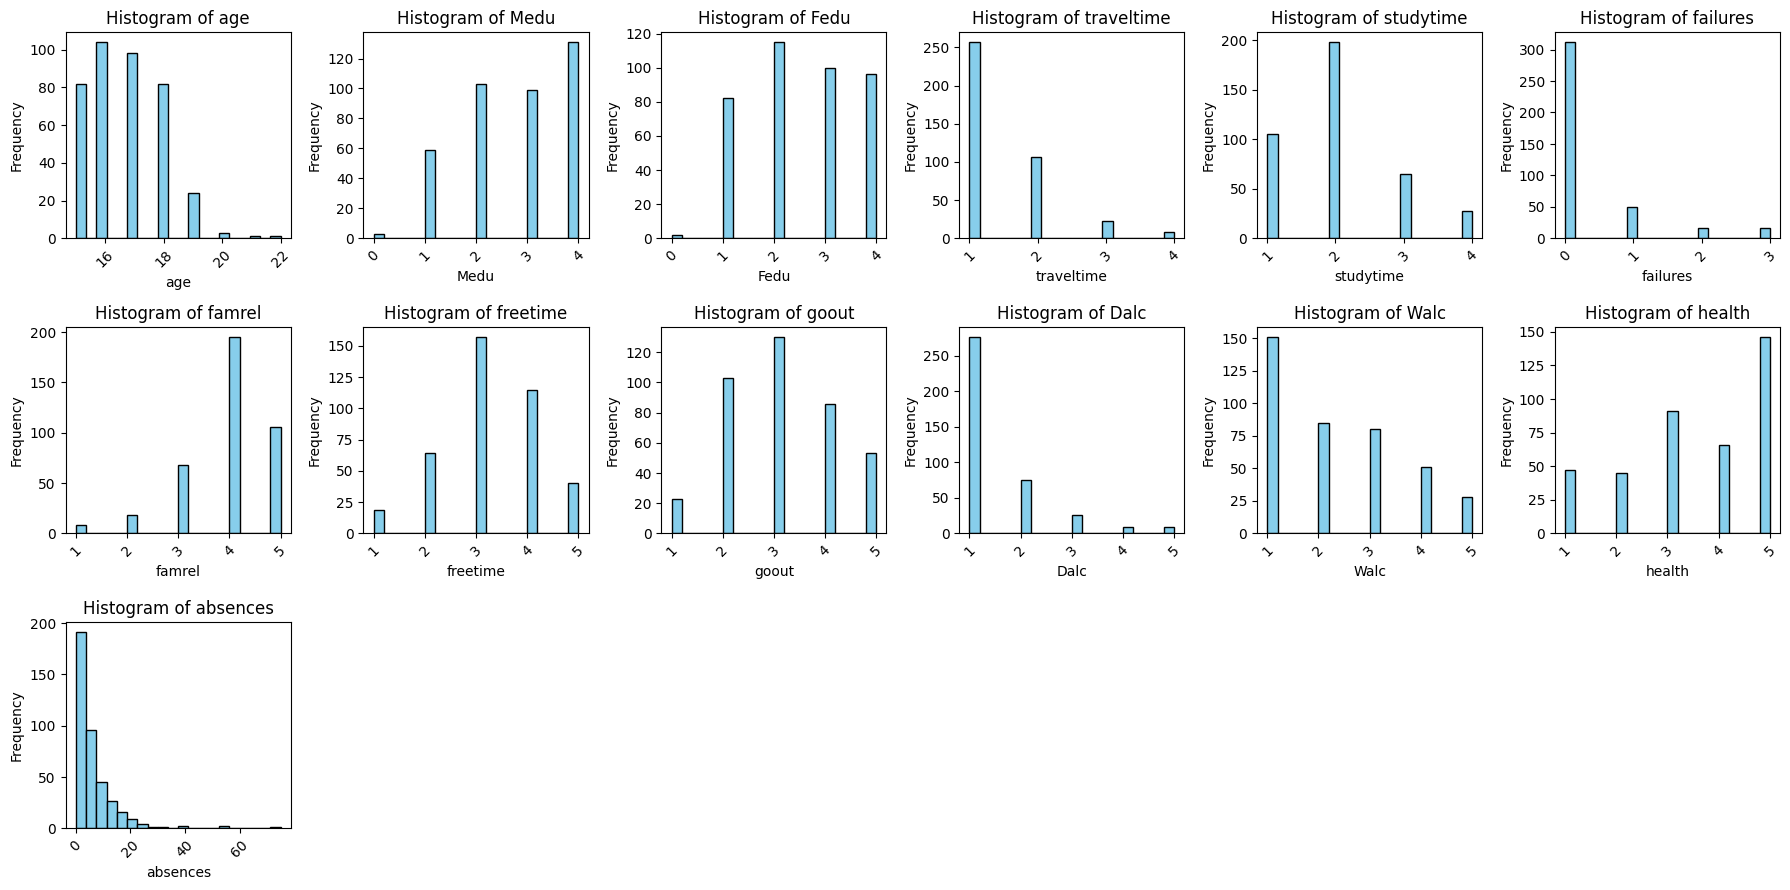

In [ ]:
columns_to_plot = [
    'age', 'Medu', 'Fedu',
    'traveltime', 'studytime', 'failures','famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
]

# Create subplots
num_plots = len(columns_to_plot)
n_rows = (num_plots + 5) // 6  # Calculate the number of rows needed
plt.figure(figsize=(18, 3 * n_rows))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, 6, i)  # Adjust grid size as needed
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

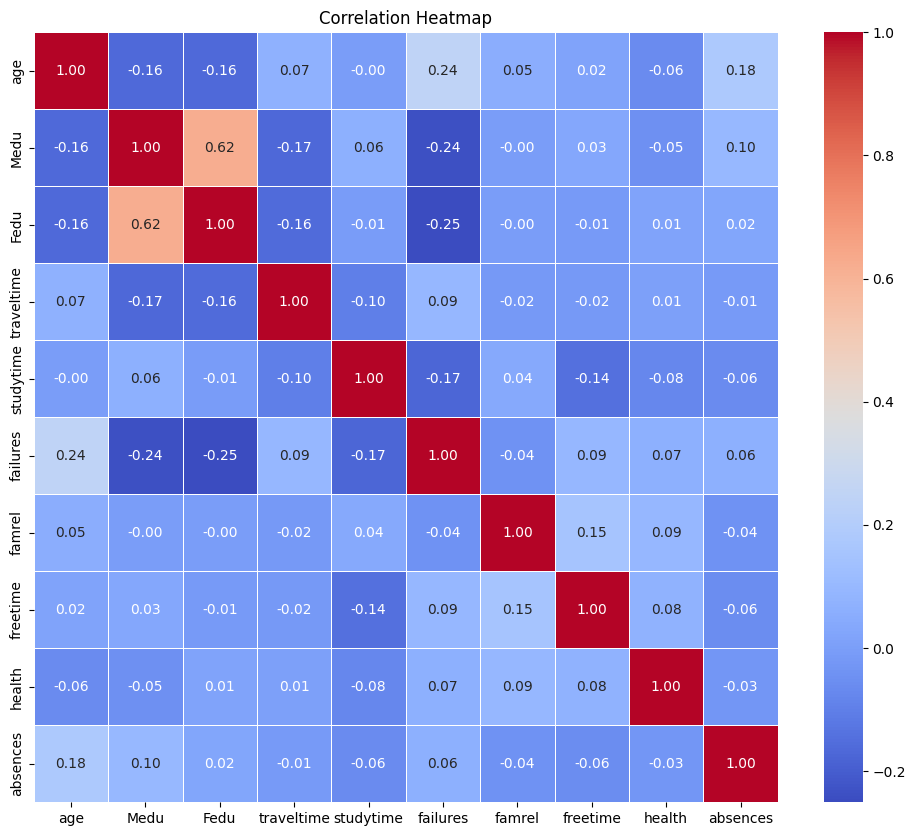

In [ ]:
columns=['age','Medu', 'Fedu',
    'traveltime', 'studytime', 'failures', 'famrel',
    'freetime','health', 'absences']
corr_matrix = data[columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
data[data.columns[0]] = data[data.columns[0]].replace({'GP': 0, 'MS': 1})
data[data.columns[1]] = data[data.columns[1]].replace({'F': 1, 'M': 0})
data[data.columns[3]] = data[data.columns[3]].replace({'U': 0, 'R': 1})
data[data.columns[5]] = data[data.columns[5]].replace({'T': 0, 'A': 1})
data[data.columns[4]] = data[data.columns[4]].replace({'GT3': 0, 'LE3': 1})
data[data.columns[15]] = data[data.columns[15]].replace({'no': 0, 'yes': 1})
data[data.columns[16]] = data[data.columns[16]].replace({'yes': 1, 'no': 0})
data[data.columns[17]] = data[data.columns[17]].replace({'no': 0, 'yes': 1})
data[data.columns[18]] = data[data.columns[18]].replace({'yes': 1, 'no': 0})
data[data.columns[19]] = data[data.columns[19]].replace({'yes': 1, 'no': 0})
data[data.columns[20]] = data[data.columns[20]].replace({'yes': 1, 'no': 0})
data[data.columns[21]] = data[data.columns[21]].replace({'yes': 1, 'no': 0})
data[data.columns[22]] = data[data.columns[22]].replace({'no': 0, 'yes': 1})

<ipython-input-38-4f4f37bc8fe5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data.columns[0]] = data[data.columns[0]].replace({'GP': 0, 'MS': 1})
<ipython-input-38-4f4f37bc8fe5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[data.columns[1]] = data[data.columns[1]].replace({'F': 1, 'M': 0})
<ipython-input-38-4f4f37bc8fe5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

In [39]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[0 1]
school
0    349
1     46
Name: count, dtype: int64
[1 0]
sex
1    208
0    187
Name: count, dtype: int64
[18 17 15 16 19 22 20 21]
age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64
[0 1]
address
0    307
1     88
Name: count, dtype: int64
[0 1]
famsize
0    281
1    114
Name: count, dtype: int64
[1 0]
pstatus
0    354
1     41
Name: count, dtype: int64
[4 1 3 2 0]
Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64
[4 1 2 3 0]
Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher']
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
['teacher' 'other' 'services' 'health' 'at_home']
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
['course' 'other' 'home' 'reputation']
reason
course        145
home          109

In [40]:
print(data)

     school  sex  age  address  famsize  pstatus  Medu  Fedu      Mjob  \
0         0    1   18        0        0        1     4     4   at_home   
1         0    1   17        0        0        0     1     1   at_home   
2         0    1   15        0        1        0     1     1   at_home   
3         0    1   15        0        0        0     4     2    health   
4         0    1   16        0        0        0     3     3     other   
..      ...  ...  ...      ...      ...      ...   ...   ...       ...   
390       1    0   20        0        1        1     2     2  services   
391       1    0   17        0        1        0     3     1  services   
392       1    0   21        1        0        0     1     1     other   
393       1    0   18        1        1        0     3     2  services   
394       1    0   19        0        1        0     1     1     other   

         Fjob  ... famrel freetime  goout  Dalc  Walc  health  absences  G1  \
0     teacher  ...      4       

In [41]:
data.describe()

school         sex         age     address     famsize     pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.526582   16.696203    0.222785    0.288608    0.103797   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000   17.000000    0.000000    0.000000    0.000000   
75%      0.000000    1.000000   18.000000    0.000000    1.000000    0.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu  traveltime   studytime  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    1.448101    2.035443  ...    3.944304   
std      1.094735    1.088201    0.697505    0.839240  ...    0.896659   
min      0.000000    0.000000    1.000000    1.000000  ...    1.000000   
25%      2.000000    2.000000    1.000000    1.000000  ...    4.000000   
50%      3.000000    2.000000    1.000000    2.000000  ...    4.000000   
75%      4.000000    3.000000    2.000000    2.000000  ...    5.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
std      0.998862    1.113278    0.890741    1.287897    1.390303    8.003096   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      3.000000    2.000000    1.000000    1.000000    3.000000    0.000000   
50%      3.000000    3.000000    1.000000    2.000000    4.000000    4.000000   
75%      4.000000    4.000000    2.000000    3.000000    5.000000    8.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000   75.000000   

               G1          G2          G3  
count  395.000000  395.000000  395.000000  
mean    10.908861   10.713924   10.415190  
std      3.319195    3.761505    4.581443  
min      3.000000    0.000000    0.000000  
25%      8.000000    9.000000    8.000000  
50%     11.000000   11.000000   11.000000  
75%     13.000000   13.000000   14.000000  
max     19.000000   19.000000   20.000000  

[8 rows x 29 columns]

In [42]:
X=data.drop(['G1','G2','G3'],axis=1)
print(X)
y = data[['G3']]
print(y)

     school  sex  age  address  famsize  pstatus  Medu  Fedu      Mjob  \
0         0    1   18        0        0        1     4     4   at_home   
1         0    1   17        0        0        0     1     1   at_home   
2         0    1   15        0        1        0     1     1   at_home   
3         0    1   15        0        0        0     4     2    health   
4         0    1   16        0        0        0     3     3     other   
..      ...  ...  ...      ...      ...      ...   ...   ...       ...   
390       1    0   20        0        1        1     2     2  services   
391       1    0   17        0        1        0     3     1  services   
392       1    0   21        1        0        0     1     1     other   
393       1    0   18        1        1        0     3     2  services   
394       1    0   19        0        1        0     1     1     other   

         Fjob  ... higher internet  romantic  famrel  freetime  goout  Dalc  \
0     teacher  ...      1       

In [43]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [44]:
X = pd.get_dummies(X, columns=['Fjob', 'Mjob', 'reason', 'guardian'], drop_first=True, dtype=int)
print(X)

     school  sex  age  address  famsize  pstatus  Medu  Fedu  traveltime  \
0         0    1   18        0        0        1     4     4           2   
1         0    1   17        0        0        0     1     1           1   
2         0    1   15        0        1        0     1     1           1   
3         0    1   15        0        0        0     4     2           1   
4         0    1   16        0        0        0     3     3           1   
..      ...  ...  ...      ...      ...      ...   ...   ...         ...   
390       1    0   20        0        1        1     2     2           1   
391       1    0   17        0        1        0     3     1           2   
392       1    0   21        1        0        0     1     1           1   
393       1    0   18        1        1        0     3     2           3   
394       1    0   19        0        1        0     1     1           1   

     studytime  ...  Fjob_teacher  Mjob_health  Mjob_other  Mjob_services  \
0         

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             395 non-null    int64
 1   sex                395 non-null    int64
 2   age                395 non-null    int64
 3   address            395 non-null    int64
 4   famsize            395 non-null    int64
 5   pstatus            395 non-null    int64
 6   Medu               395 non-null    int64
 7   Fedu               395 non-null    int64
 8   traveltime         395 non-null    int64
 9   studytime          395 non-null    int64
 10  failures           395 non-null    int64
 11  schoolsup          395 non-null    int64
 12  famsup             395 non-null    int64
 13  paid               395 non-null    int64
 14  activities         395 non-null    int64
 15  nursery            395 non-null    int64
 16  higher             395 non-null    int64
 17  internet        

In [46]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Linear_Regression

In [47]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.35, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.20, random_state=42)

train_test_split(60-40)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train1, y_train1)
y_pred1 = lm2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

4.322443692042204


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.14904009255355366

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

3.3362728448111754

train_test_split(65-35)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
y_pred2 = lm2.predict(X_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

4.426215706283484


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.16175009006197072

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

3.41712681125236

train_test_split(70-30)



In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train3, y_train3)
y_pred3 = lm2.predict(X_test3)
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

4.217846027981649


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.1906935768025575

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

3.2881398680758984

train_test_split(75-25)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train4, y_train4)
y_pred4 = lm2.predict(X_test4)
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

4.2853381529819865


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.2028717753348832

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

3.4366543865051855

train_test_split(80-20)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train5, y_train5)
y_pred5 = lm2.predict(X_test5)
print(np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))

4.195680802721378


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.1414924741119582

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

3.395260925801918

# **KNN**

train_test_split(60-40)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred1

array([[ 8.52380952],
       [11.19047619],
       [11.14285714],
       [11.57142857],
       [10.23809524],
       [ 9.47619048],
       [12.52380952],
       [11.14285714],
       [ 8.04761905],
       [11.71428571],
       [12.33333333],
       [11.80952381],
       [ 9.47619048],
       [ 7.85714286],
       [11.71428571],
       [11.28571429],
       [ 9.66666667],
       [ 9.0952381 ],
       [ 7.61904762],
       [ 8.23809524],
       [11.80952381],
       [12.14285714],
       [ 8.71428571],
       [11.23809524],
       [ 9.61904762],
       [11.57142857],
       [ 9.        ],
       [10.52380952],
       [11.        ],
       [12.71428571],
       [10.28571429],
       [ 9.        ],
       [ 9.14285714],
       [11.95238095],
       [10.52380952],
       [10.71428571],
       [ 9.38095238],
       [13.        ],
       [12.85714286],
       [11.0952381 ],
       [ 8.95238095],
       [11.23809524],
       [11.38095238],
       [10.42857143],
       [11.9047619 ],
       [ 9

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.17535613790007187

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

3.392706449668475

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

18.10572921151583

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

4.255082750254785

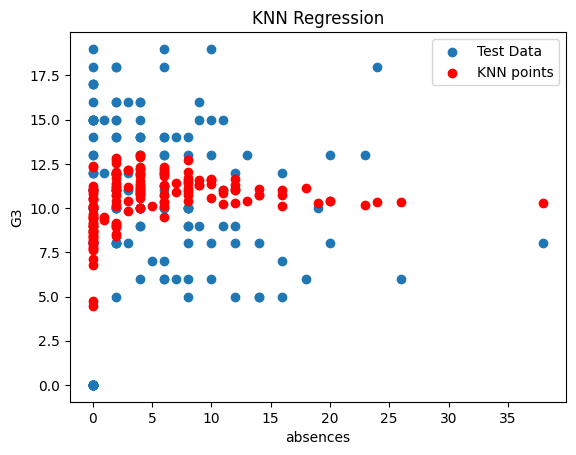

In [ ]:
plt.scatter(X_test1['absences'], y_test1, label='Test Data')
plt.scatter(X_test1['absences'], y_pred1, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(65-35)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred2 = model.predict(X_test2)

In [ ]:
y_pred2

array([[ 8.57142857],
       [11.14285714],
       [11.14285714],
       [11.66666667],
       [10.23809524],
       [ 9.0952381 ],
       [12.57142857],
       [11.14285714],
       [ 7.85714286],
       [11.76190476],
       [12.33333333],
       [11.85714286],
       [10.19047619],
       [ 8.0952381 ],
       [11.80952381],
       [11.80952381],
       [ 9.52380952],
       [ 8.9047619 ],
       [ 7.57142857],
       [ 7.95238095],
       [11.61904762],
       [11.85714286],
       [ 8.71428571],
       [11.28571429],
       [10.38095238],
       [11.52380952],
       [ 9.61904762],
       [10.52380952],
       [11.        ],
       [13.14285714],
       [10.19047619],
       [ 9.        ],
       [ 9.95238095],
       [12.0952381 ],
       [10.38095238],
       [10.28571429],
       [ 9.61904762],
       [13.04761905],
       [12.38095238],
       [11.        ],
       [ 8.76190476],
       [11.42857143],
       [11.23809524],
       [10.38095238],
       [12.        ],
       [ 9

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.16708792680885998

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

3.5296334361082558

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

19.466630777011044

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

4.412100494890279

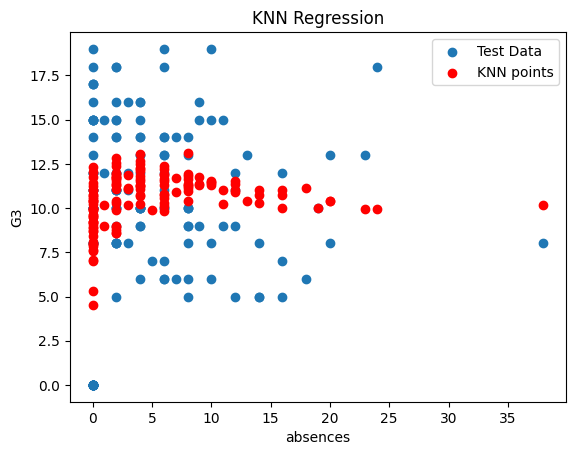

In [ ]:
plt.scatter(X_test2['absences'], y_test2, label='Test Data')
plt.scatter(X_test2['absences'], y_pred2, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(70-30)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred3 = model.predict(X_test3)

In [ ]:
y_pred3

array([[ 8.33333333],
       [10.85714286],
       [11.23809524],
       [11.66666667],
       [10.52380952],
       [ 8.38095238],
       [12.14285714],
       [11.38095238],
       [ 9.14285714],
       [12.28571429],
       [11.85714286],
       [11.61904762],
       [ 9.9047619 ],
       [ 8.        ],
       [12.23809524],
       [11.66666667],
       [ 9.57142857],
       [ 9.42857143],
       [ 7.52380952],
       [ 8.23809524],
       [11.95238095],
       [11.85714286],
       [ 9.14285714],
       [11.23809524],
       [10.47619048],
       [11.57142857],
       [10.        ],
       [10.85714286],
       [11.95238095],
       [12.38095238],
       [10.57142857],
       [ 9.42857143],
       [ 9.76190476],
       [11.95238095],
       [ 9.76190476],
       [10.33333333],
       [ 9.0952381 ],
       [13.19047619],
       [12.80952381],
       [10.80952381],
       [ 9.23809524],
       [11.42857143],
       [11.19047619],
       [10.52380952],
       [11.38095238],
       [ 9

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.1536045525951979

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

3.4777911164465793

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

18.605518397835326

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

4.313411457052912

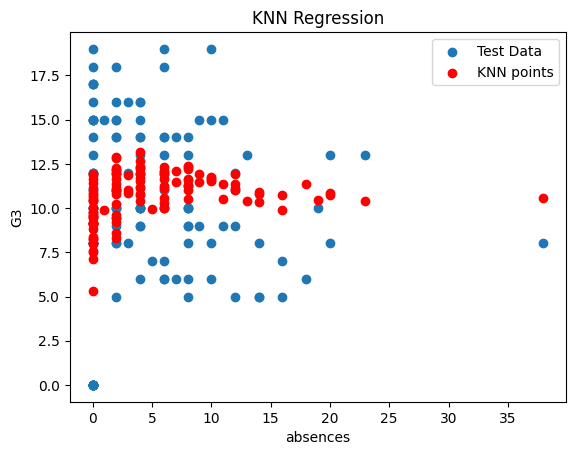

In [ ]:
plt.scatter(X_test3['absences'], y_test3, label='Test Data')
plt.scatter(X_test3['absences'], y_pred3, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(75-25)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred4 = model.predict(X_test4)

In [ ]:
y_pred4

array([[ 8.57142857],
       [10.61904762],
       [11.04761905],
       [12.        ],
       [10.19047619],
       [ 8.66666667],
       [12.28571429],
       [11.04761905],
       [ 9.14285714],
       [12.52380952],
       [11.85714286],
       [12.        ],
       [10.33333333],
       [ 7.85714286],
       [12.47619048],
       [11.66666667],
       [ 9.42857143],
       [ 8.71428571],
       [ 7.52380952],
       [ 8.23809524],
       [11.76190476],
       [11.47619048],
       [ 8.71428571],
       [11.        ],
       [10.52380952],
       [11.23809524],
       [ 9.61904762],
       [10.95238095],
       [11.23809524],
       [12.80952381],
       [10.14285714],
       [ 9.42857143],
       [ 9.76190476],
       [11.71428571],
       [10.38095238],
       [10.23809524],
       [ 9.0952381 ],
       [13.04761905],
       [12.0952381 ],
       [10.52380952],
       [ 8.71428571],
       [11.42857143],
       [11.28571429],
       [11.        ],
       [11.28571429],
       [ 9

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.1626288220453067

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

3.5709475709475704

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

19.291234338853386

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

4.39217876899989

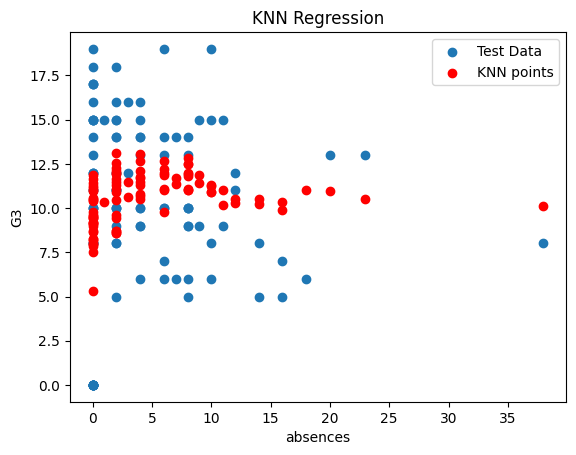

In [ ]:
plt.scatter(X_test4['absences'], y_test4, label='Test Data')
plt.scatter(X_test4['absences'], y_pred4, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(80-20)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train5, y_train5)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred5 = model.predict(X_test5)

In [ ]:
y_pred5

array([[ 8.57142857],
       [11.        ],
       [11.38095238],
       [12.        ],
       [10.0952381 ],
       [ 8.52380952],
       [12.04761905],
       [10.76190476],
       [ 8.33333333],
       [12.38095238],
       [12.        ],
       [11.76190476],
       [10.47619048],
       [ 7.66666667],
       [12.23809524],
       [12.0952381 ],
       [ 9.71428571],
       [ 8.71428571],
       [ 8.14285714],
       [ 8.23809524],
       [11.76190476],
       [11.38095238],
       [10.14285714],
       [11.38095238],
       [10.52380952],
       [11.23809524],
       [10.19047619],
       [11.42857143],
       [11.95238095],
       [12.80952381],
       [10.28571429],
       [ 9.04761905],
       [ 9.80952381],
       [11.76190476],
       [10.42857143],
       [10.14285714],
       [ 8.38095238],
       [13.04761905],
       [12.47619048],
       [10.76190476],
       [ 8.19047619],
       [10.9047619 ],
       [11.04761905],
       [11.        ],
       [10.80952381],
       [ 9

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.148286671694694

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

3.4291742013261004

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test5,y_pred5)

17.46442205574213

In [ ]:
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
rmse

4.179045591488818

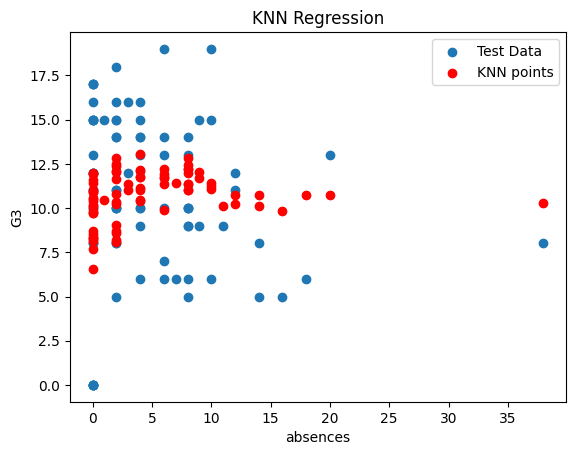

In [ ]:
plt.scatter(X_test5['absences'], y_test5, label='Test Data')
plt.scatter(X_test5['absences'], y_pred5, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

# SVM

train_test_split(60-40)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
y_pred1

array([ 6.46472746,  8.49089466,  8.87154649, 11.35148314,  8.78261772,
       11.90572298, 12.8885047 , 12.39306003, 10.99453472, 13.97143187,
       14.2849962 , 11.57523862, 11.38781651, 13.8251294 , 10.61924781,
       12.13457825, 11.60253744, 11.19829916, 12.37879122, 11.97696071,
       11.82620588, 12.85147062, 13.85965016, 10.82438311, 11.46825342,
       13.43353865, 13.63487511, 15.59693613, 13.39426233, 14.83230905,
        7.82678575, 11.86769229, 14.74813801,  8.00744973, 11.42525411,
        9.12997053,  9.63939598, 10.78337198, 12.86054808,  8.05655638,
        5.44414568, 11.01656067, 11.92765873,  9.44845511, 11.94401619,
       11.22637922, 10.26432837,  9.64192134, 13.44453396, 12.99068427,
       10.00743921, 14.41369321, 15.88595297, 11.95634634,  8.6862477 ,
        7.70538307, 12.34416119,  8.98183647, 14.27886412, 14.87310014,
       13.23657681, 12.03397151,  1.43689013, 11.90055388, 10.96802464,
       11.11840302, 10.29345556, 11.52681234, 10.23462094, 13.87

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.12743524098622694

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

3.3481318304434216

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

19.157871624709344

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

4.376970599022724

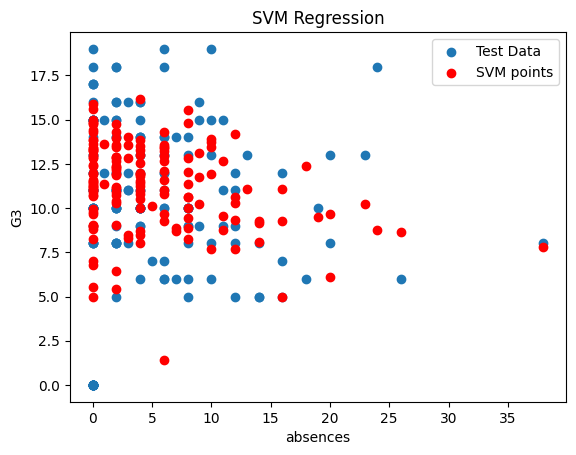

In [ ]:
plt.scatter(X_test1['absences'], y_test1, label='Test Data')
plt.scatter(X_test1['absences'], y_pred1, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(65-35)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred2 = model.predict(X_test2)

In [ ]:
y_pred2

array([ 6.60634737,  8.86761312,  9.1874167 , 11.28760739,  8.41403386,
       12.39575672, 12.15921236, 12.18597583, 10.99057341, 12.7247594 ,
       14.3032993 , 12.33121638, 12.03994698, 14.48970743, 10.4797213 ,
       10.74993651, 11.6557592 , 11.20409291, 11.96152014, 11.40634887,
       11.50395342, 12.10752362, 13.67426017,  9.61114965, 11.24441756,
       13.39220112, 13.49736557, 14.80564187, 12.94949404, 14.03640794,
        6.95198988, 11.84737278, 14.42285627,  8.69277054, 11.75930736,
        9.48631628,  9.4376012 , 10.79414531, 13.1435231 ,  7.93024375,
        6.20976832, 11.51974775, 11.61764188,  8.71963924, 11.48133031,
       10.86078057,  9.79349019,  8.95129101, 12.50530237, 12.16713993,
       10.2695617 , 13.92993231, 15.7109561 , 12.11563272,  9.60368672,
        8.7077355 , 12.61434814,  8.72343526, 14.86732901, 14.37730678,
       12.26408596, 12.48232563,  1.30339785, 11.99978047,  9.86531472,
       11.69010659, 10.06253076, 11.87932817, 10.42992842, 13.84

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.12759734838678527

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

3.5004362674040808

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

20.38959555811671

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

4.515483978281477

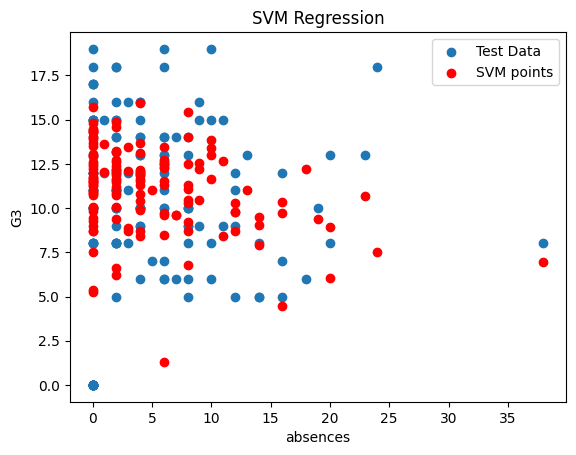

In [ ]:
plt.scatter(X_test2['absences'], y_test2, label='Test Data')
plt.scatter(X_test2['absences'], y_pred2, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(70-30)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train3, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred3 = model.predict(X_test3)

In [ ]:
y_pred3

array([ 4.841121  ,  8.21152931,  9.48511665, 11.95418773,  8.89659813,
       10.58177501, 13.37849203, 12.00712787, 11.20679461, 13.70516572,
       13.46264109, 11.75673351, 11.82671625, 13.81676997, 10.76753364,
       11.61368372, 11.69160564, 10.48245322, 11.17371566, 11.61206259,
       11.93633625, 12.63113744, 13.96403243, 11.25119119, 11.14042473,
       14.16297254, 13.36228267, 14.67825879, 13.79623388, 14.62116055,
        8.70276233, 11.36750278, 14.4568744 ,  9.4156694 , 11.18257455,
        9.6636992 ,  8.92732556, 10.72860116, 13.22948765,  7.46958721,
        5.48769273, 11.69011431, 12.05102095,  8.73698044, 11.85581572,
       11.15696296, 10.20250764,  9.15474149, 11.36969163, 13.48745095,
       10.28466002, 13.96722229, 14.91383744, 12.20727223,  9.25176466,
        9.16886585, 12.37287023,  8.89747139, 14.8313946 , 14.24124068,
       12.6706126 , 12.18063802,  2.22564178, 11.97036302,  9.81901707,
       11.20536386, 10.44499474, 11.22894755, 10.52105056, 14.25

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.17290994124373604

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

3.2959357454883866

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

18.18114612033895

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

4.263935520190116

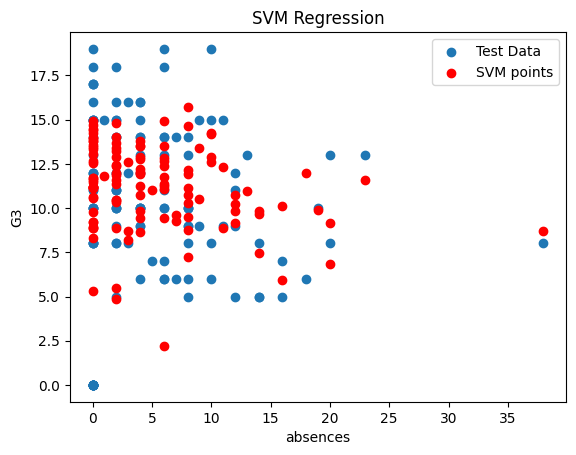

In [ ]:
plt.scatter(X_test3['absences'], y_test3, label='Test Data')
plt.scatter(X_test3['absences'], y_pred3, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(75-25)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train4, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred4 = model.predict(X_test4)

In [ ]:
y_pred4

array([ 3.94571194,  8.26461238,  8.66496722, 12.80435098,  8.47823814,
       10.32007027, 12.24699718, 12.04712793, 10.99235524, 12.27035881,
       13.10386939, 11.66435277, 11.29324132, 12.80770209, 11.2073335 ,
       11.6013604 , 12.40858542, 10.23358898, 11.22491828, 11.24551249,
       11.2226588 , 11.84592262, 14.18404476,  9.749746  , 10.86651029,
       12.99578737, 14.35342502, 14.4047851 , 12.63577481, 14.41802356,
        9.41279246, 11.52101014, 14.19439611,  9.43683263, 11.10062294,
        9.68948818,  8.66296383, 10.83122097, 13.01819039,  7.29683926,
        6.48402297, 11.83476859, 11.66998027,  8.29806406, 12.01756096,
       11.27073235,  9.05989897,  8.67111586, 10.81974728, 12.48187218,
       10.08641903, 13.47059431, 15.23326895, 11.41148545,  9.40492557,
        8.37004858, 13.38857108, 10.46116352, 13.36123176, 13.72771736,
       13.5755221 , 11.73061568,  3.18377299, 12.01808848,  8.51205195,
       10.79770146, 10.4350176 , 11.22122734, 10.24856298, 13.79

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.14799197785595097

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

3.549793238316714

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

19.628435807774046

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

4.430399057395851

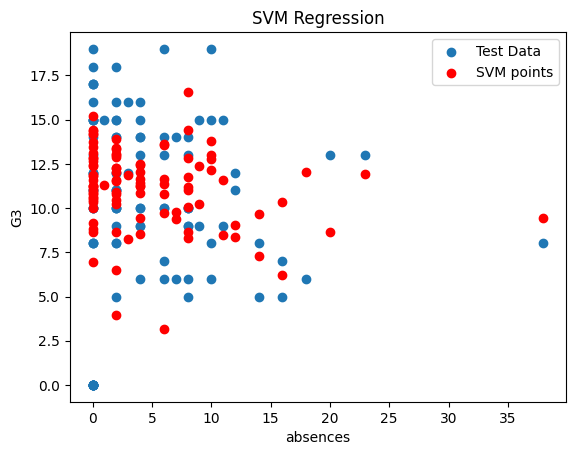

In [ ]:
plt.scatter(X_test4['absences'], y_test4, label='Test Data')
plt.scatter(X_test4['absences'], y_pred4, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(80-20)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train5, y_train5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred5 = model.predict(X_test5)

In [ ]:
y_pred5

array([ 4.24274173,  8.42775463,  9.2587392 , 12.29264424,  9.25974358,
       10.65843889, 12.75605326, 12.41860514, 10.82030954, 13.13087001,
       13.61948236, 11.66046261, 11.35207249, 12.88838541, 10.70566743,
       11.90975204, 12.09891731, 10.28647505, 11.59284683, 11.47377863,
       11.3912783 , 11.63173396, 13.92052974, 10.8154045 , 11.45994568,
       13.48330108, 13.71267147, 14.03634193, 13.50802333, 14.36830071,
        9.59492112, 11.45938453, 13.90036236,  9.51139718, 11.35572762,
       10.42040321,  8.11785506, 10.36123125, 12.35343069,  6.67943078,
        5.07275633, 11.81023933, 11.61730332,  8.16335708, 11.53005793,
       10.97160591,  9.86469432,  9.38226822, 12.11285771, 12.81089879,
        9.82672967, 13.54678272, 14.84487895, 11.67267021,  9.1714544 ,
        8.8536247 , 12.75096908,  9.20268263, 13.71478656, 13.63437018,
       13.02633284, 11.46441292,  1.63101551, 11.66430538,  8.61019973,
       10.88040111,  9.60135653, 11.05168557, 10.44742556, 13.97

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.1441100364160165

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

3.3340227445143604

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test5,y_pred5)

17.550064159552882

In [ ]:
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
rmse

4.189279670725372

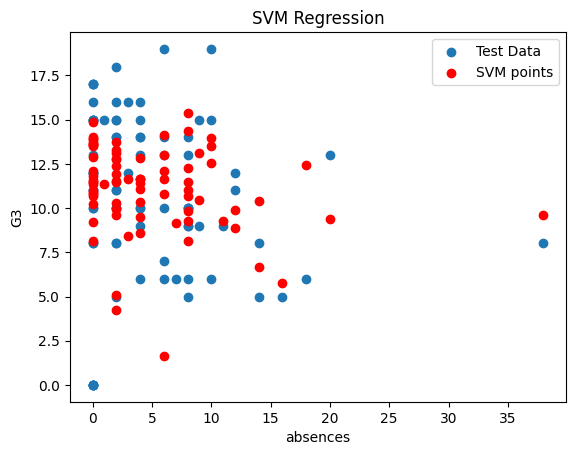

In [ ]:
plt.scatter(X_test5['absences'], y_test5, label='Test Data')
plt.scatter(X_test5['absences'], y_pred5, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

## Decision_Trees

train_test_split(60-40)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

-0.1988980213645195

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

3.740506329113924

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

26.32278481012658

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

5.130573536177664

train_test_split(65-35)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

-0.4341225867315077

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

4.381294964028777

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

33.51798561151079

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

5.789471963099121

train_test_split(70-30)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

-0.5325711238467272

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

4.277310924369748

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

33.6890756302521

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

5.804229115933666

train_test_split(75-25)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.20026218588625033

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

3.1515151515151514

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

18.424242424242426

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

4.2923469599092785

train_test_split(80-20)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train5,y_train5)

In [ ]:
y_pred5 = clf.predict(X_test5)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

-0.16673959928734394

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

3.721518987341772

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test5,y_pred5)

23.924050632911392

In [ ]:
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
rmse

4.891221793469541

## RandomForest

train_test_split(60-40)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred1 = rf.predict(X_test1)

 Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

0.29994663942127864

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

3.0512658227848104

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)

15.370243037974687

In [ ]:
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

3.9204901527710394

train_test_split(65-35)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred2= rf.predict(X_test2)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

0.3207128614643263

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

3.1358273381294963

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)

15.876143884892087

In [ ]:
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

3.9844879074847355

train_test_split(70-30)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train3, y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred3 = rf.predict(X_test3)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

0.326692687800365

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

3.0588235294117645

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)

14.800684033613445

In [ ]:
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

3.8471657143426308

train_test_split(75-25)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train4, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred4 = rf.predict(X_test4)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.35950901352560294

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

3.0771717171717174

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)

14.755537373737376

In [ ]:
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

3.8412937109439285

train_test_split(80-20)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train5, y_train5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred5 = rf.predict(X_test5)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.29151225580595763

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

3.024050632911393

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test5,y_pred5)

14.527574683544303

In [ ]:
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
rmse

3.8115055665109954

## Adaboost

train_test_split(60-40)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

r2_score


0.21350511046776033

In [ ]:

print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

mean_absolute_error


3.267037672715336

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.155494841159424

train_test_split(65-35)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

r2_score


0.1935156541659534

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

mean_absolute_error


3.481063456451016

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.341539815325953

train_test_split(70-30)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

r2_score


0.1431763486873614

In [ ]:

print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

mean_absolute_error


3.4834090088525222

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.339902284317856

train_test_split(75-25)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train4, y_train4)

y_pred4 = model.predict(X_test4)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

r2_score


0.14219752281534292

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

mean_absolute_error


3.583653805986721

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.445438967395542

train_test_split(80-20)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train5, y_train5)

y_pred5 = model.predict(X_test5)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)


r2_score


0.12745901616951372

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)


mean_absolute_error


3.4836248294593934

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test5,y_pred5)
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.22983381668464

# xgboost

train_test_split(60-40)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)
y_pred1


array([ 9.523725  , 10.203066  , 12.08154   , 11.576051  ,  8.438828  ,
        5.760688  , 15.204654  , 12.662103  ,  8.620178  , 13.444092  ,
       10.452833  , 11.755443  , 10.78211   ,  8.658778  , 11.670288  ,
       10.376742  , 11.090784  ,  7.964693  ,  4.7471013 ,  6.152485  ,
       11.10457   , 10.852315  , 12.99957   , 12.427852  , 14.269518  ,
       10.973355  ,  6.461976  , 13.038173  ,  6.258523  , 13.946151  ,
        7.6130714 , 10.8109255 , 15.820023  , 11.6315565 ,  6.087911  ,
        7.999457  ,  0.8797466 , 13.702202  , 12.197803  , 11.454506  ,
        7.7138147 , 11.57121   , 12.671182  ,  8.4800415 , 10.311266  ,
       14.005774  , 10.779467  ,  8.993673  , 14.640495  , 14.866524  ,
        7.4423695 , 14.75871   , 13.9188    , 10.202458  , 10.909343  ,
       11.245255  , 11.931596  ,  8.455144  , 10.083844  ,  9.37606   ,
       12.894899  , 12.406742  ,  9.233689  , 13.635161  , 11.800808  ,
       14.092581  ,  7.8607893 , 11.896449  , 11.521354  , 13.22

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred1)

r2_score


0.10385710000991821

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test1,y_pred1)

mean_absolute_error


3.3754647320160007

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test1,y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.435713232637776

train_test_split(65-35)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)
y_pred2


array([ 8.558394  , 10.099827  , 11.315982  , 11.689879  ,  8.051955  ,
        9.162361  , 14.268392  , 11.681772  ,  8.314124  , 13.397146  ,
       13.006366  , 10.576512  ,  9.543898  , 13.514755  , 11.557159  ,
       11.909207  ,  9.107269  ,  8.180331  ,  6.260051  ,  4.6649714 ,
       11.759179  , 10.455619  , 12.262287  , 10.5734005 , 11.703211  ,
       11.482619  , 10.463945  , 10.36981   ,  7.2819214 , 12.820687  ,
        8.875745  , 12.065434  , 17.316292  , 10.311396  ,  7.829038  ,
        8.538706  ,  2.5227835 , 12.28975   , 11.717188  , 10.546409  ,
        8.507555  , 10.87163   , 12.212235  ,  7.3157506 , 11.432625  ,
       15.511566  , 11.26078   , 10.727972  , 11.593958  , 16.279442  ,
        7.290093  , 12.978545  , 16.408092  ,  9.864031  ,  9.448651  ,
       11.207466  , 11.950282  ,  9.310422  , 16.178741  , 11.202628  ,
       14.1994915 , 12.099499  ,  8.008516  , 12.345209  ,  9.199458  ,
        9.661184  ,  8.698058  , 11.105771  , 11.398206  , 14.41

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

r2_score


0.19663900136947632

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test2,y_pred2)

mean_absolute_error


3.3596992561285446

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test2,y_pred2)
mse = mean_squared_error(y_test2, y_pred2)
rmse = np.sqrt(mse)
rmse


mean_squared_error


4.33312481918064

train_test_split(70-30)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)
y_pred3


array([ 8.398615  , 11.509331  , 11.064576  , 11.188931  ,  7.512081  ,
       10.273066  , 15.003956  , 11.340847  ,  9.796936  , 12.850895  ,
       12.649966  , 11.804107  , 12.255895  ,  7.2515774 , 12.274751  ,
       11.607719  , 12.004321  , 10.157607  ,  3.9175441 ,  4.2082443 ,
       12.299027  ,  9.811507  , 11.929445  , 10.49814   , 10.965338  ,
       11.692521  ,  8.665517  ,  7.5540247 ,  6.1235814 , 15.137498  ,
        7.321183  , 10.957251  , 17.435213  , 11.16377   ,  7.346489  ,
       10.236624  ,  1.7271612 , 11.446489  , 12.918704  , 11.0875225 ,
        7.520134  , 12.81756   , 11.695259  ,  9.418592  ,  9.866273  ,
       12.951895  , 12.878639  , 10.366175  , 11.167566  , 16.17597   ,
        7.6373444 , 14.768393  , 14.177445  , 11.490484  , 10.360603  ,
       11.70511   , 11.35494   , 10.186607  , 12.826674  , 10.749565  ,
       12.786187  , 12.289084  ,  7.4745545 , 13.142145  , 10.1927    ,
       11.623984  ,  8.761676  , 11.129183  , 11.716419  , 12.15

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)


r2_score


0.18671536445617676

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test3,y_pred3)

mean_absolute_error


3.3281644302255966

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test3,y_pred3)
mse = mean_squared_error(y_test3, y_pred3)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.22820027777993

train_test_split(75-25)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train4, y_train4)

y_pred4 = model.predict(X_test4)
y_pred4


array([11.796809  , 10.103628  , 11.418733  , 13.158089  ,  6.91541   ,
        9.284702  , 14.581807  , 13.0194845 ,  9.271203  , 11.334283  ,
       14.426629  , 12.457479  , 10.449707  , 10.53162   , 11.125734  ,
       10.970436  ,  6.5629    ,  8.681423  ,  8.4654875 ,  6.1266537 ,
       13.449889  , 11.198114  ,  9.341182  ,  8.581042  ,  9.622455  ,
       13.003245  ,  9.946101  , 13.0519905 ,  4.628843  , 15.513297  ,
        8.777873  , 10.915865  , 15.244492  , 11.572026  ,  8.978593  ,
        9.533282  ,  1.3528582 , 13.996054  , 12.617496  ,  9.380577  ,
        8.254353  , 11.973575  , 10.858544  ,  7.900088  , 13.81633   ,
       10.791546  ,  7.6787767 , 10.620577  , 12.625742  , 13.343745  ,
        9.453916  , 12.121271  , 13.850665  , 10.935682  , 11.99458   ,
        9.192     , 11.848625  ,  8.456086  , 14.328525  , 13.887305  ,
       14.086942  , 12.149757  ,  5.8975544 , 12.427867  ,  9.823294  ,
       11.358863  ,  9.901035  , 10.043724  , 12.254245  , 10.73

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)


r2_score


0.34949827194213867

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test4,y_pred4)

mean_absolute_error


3.0169507638372557

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test4,y_pred4)
mse = mean_squared_error(y_test4, y_pred4)
rmse = np.sqrt(mse)
rmse

mean_squared_error


3.8711967313603823

train_test_split(80-20)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train5, y_train5)

y_pred5 = model.predict(X_test5)
y_pred5


array([ 8.445806 ,  7.715879 , 10.124655 , 12.566258 ,  9.654125 ,
        7.8580303, 14.277879 , 12.277528 ,  6.6346936, 12.01936  ,
       14.718914 , 13.5595875, 10.274134 ,  6.8002043, 12.571772 ,
       12.663942 , 12.303804 ,  9.043551 ,  2.9275687,  4.608858 ,
       12.692363 , 10.157656 , 11.108281 , 11.047978 ,  8.48198  ,
        9.561446 , 10.750542 ,  9.725183 ,  8.329335 , 14.570362 ,
       12.7355175, 11.268459 , 16.566463 , 10.1085615,  4.2109404,
       10.542743 ,  3.3460019, 10.416176 , 14.483975 ,  8.044596 ,
        9.533453 , 11.787662 , 10.378173 , 10.070877 , 11.817561 ,
       13.58848  ,  9.090192 ,  8.058972 , 12.244097 , 15.373063 ,
       11.919635 , 15.750408 , 14.384152 , 10.767333 , 10.227757 ,
        9.938259 , 12.92358  ,  7.717306 , 11.326281 , 11.963815 ,
       12.821017 , 12.310109 ,  7.9876   , 12.003428 , 10.215202 ,
       11.405288 ,  9.777372 ,  9.778073 , 12.577752 , 12.710988 ,
       10.132756 ,  9.526844 , 13.731744 , 12.78133  ,  8.3045

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)


r2_score


0.1539420485496521

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test5,y_pred5)

mean_absolute_error


3.409548699101315

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test5,y_pred5)
mse = mean_squared_error(y_test5, y_pred5)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.165148360968186

# ANN

# train_test_split(60-40)

### 1

In [54]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4047 - mae: 3.4047 


[3.3419010639190674, 3.3419010639190674]

In [ ]:
model.summary();

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 30)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,070 (27.62 KB)

 Trainable params: 2,356 (9.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,714 (18.42 KB)

Text(0.5, 0, 'epochs')

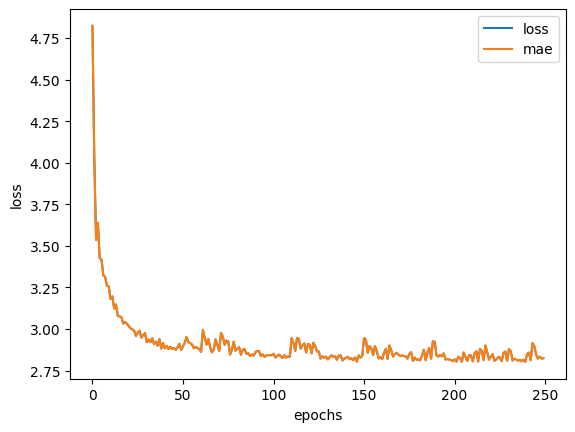

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 2

In [61]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 200, verbose=0)

In [62]:
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7656 - mae: 4.7656  


[4.812305450439453, 4.812305450439453]

In [63]:
model.summary();

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 26)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 17)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,162 (12.36 KB)

 Trainable params: 3,160 (12.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Text(0.5, 0, 'epochs')

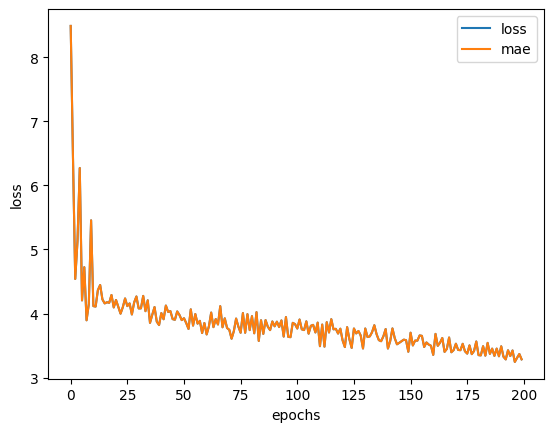

In [64]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 3

In [65]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 150, verbose=0)

In [66]:
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4714 - mae: 3.4714  


[3.4190218448638916, 3.4190218448638916]

In [67]:
model.summary();

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 27)                  │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 17)                  │             442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 15)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,736 (30.22 KB)

 Trainable params: 2,578 (10.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,158 (20.15 KB)

Text(0.5, 0, 'epochs')

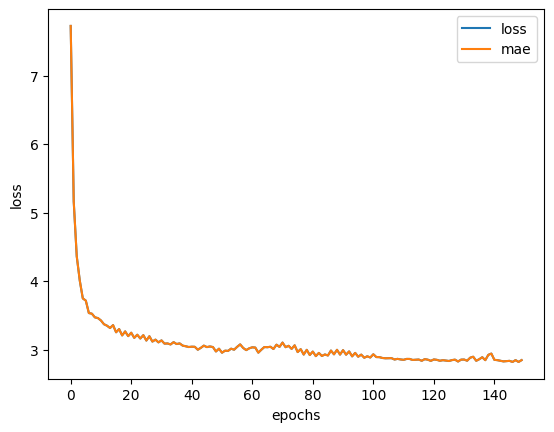

In [68]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## train_test_split(65-35)

## 1

In [69]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(32),

                            tf.keras.layers.Dense(24),

                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 250, verbose=0)

In [70]:
model.evaluate(X_test2, y_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4810 - mae: 3.4810  


[3.4857497215270996, 3.4857497215270996]

In [71]:
model.summary();

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (32, 32)                    │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (32, 24)                    │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (32, 18)                    │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (32, 17)                    │             323 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (32, 10)                    │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,110 (35.59 KB)

 Trainable params: 3,036 (11.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,074 (23.73 KB)

Text(0.5, 0, 'epochs')

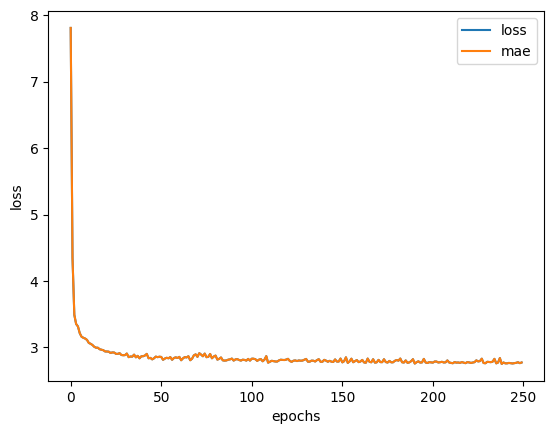

In [72]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 2

In [73]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(33),

                            tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 150, verbose=0)

In [74]:
model.evaluate(X_test2, y_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4809 - mae: 3.4809  


[3.4464125633239746, 3.4464125633239746]

In [75]:
model.summary();

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (32, 33)                    │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (32, 29)                    │             986 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (32, 27)                    │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (32, 23)                    │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (32, 17)                    │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (32, 1)                     │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,560 (49.07 KB)

 Trainable params: 4,186 (16.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,374 (32.71 KB)

Text(0.5, 0, 'epochs')

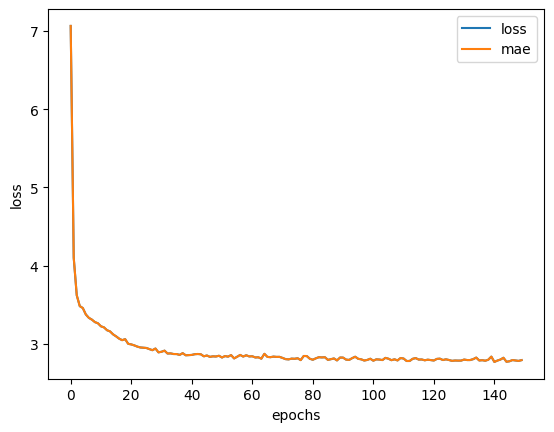

In [76]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 3

In [77]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(34),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 250, verbose=0)

In [78]:
model.evaluate(X_test2, y_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5018 - mae: 3.5018  


[3.4900286197662354, 3.4900286197662354]

In [79]:
model.summary();

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (32, 34)                    │           1,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (32, 20)                    │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (32, 15)                    │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (32, 10)                    │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (32, 5)                     │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (32, 1)                     │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,790 (30.43 KB)

 Trainable params: 2,596 (10.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,194 (20.29 KB)

Text(0.5, 0, 'epochs')

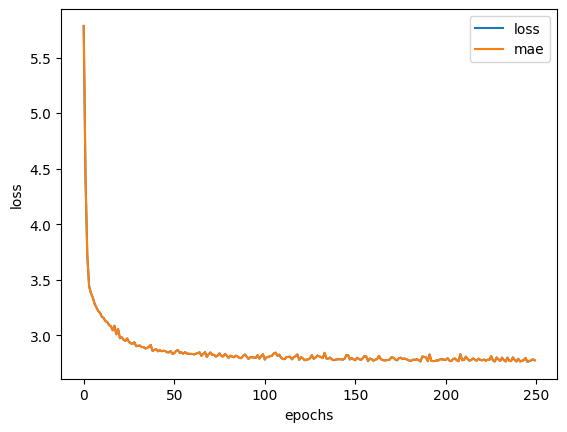

In [80]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### train_test_split(70-30)

## 1

In [81]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 250, verbose=0)

In [82]:
model.evaluate(X_test3, y_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4457 - mae: 3.4457  


[3.359410285949707, 3.359410285949707]

In [83]:
model.summary();

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 20)                  │             580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,710 (26.21 KB)

 Trainable params: 2,236 (8.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,474 (17.48 KB)

Text(0.5, 0, 'epochs')

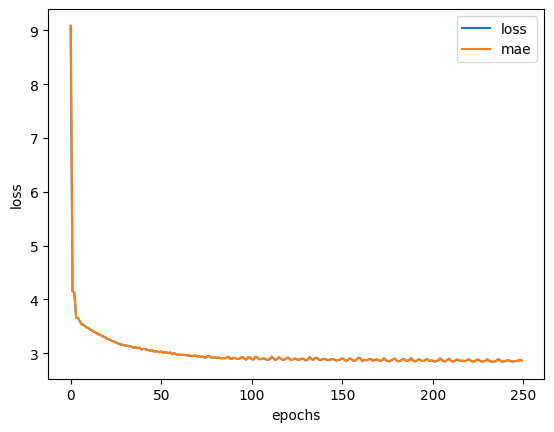

In [84]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 2

In [85]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(19),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 200, verbose=0)

In [86]:
model.evaluate(X_test3, y_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4160 - mae: 3.4160  


[3.3141136169433594, 3.3141136169433594]

In [87]:
model.summary();

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 27)                  │             783 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 19)                  │             494 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,241 (40.01 KB)

 Trainable params: 3,413 (13.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,828 (26.68 KB)

Text(0.5, 0, 'epochs')

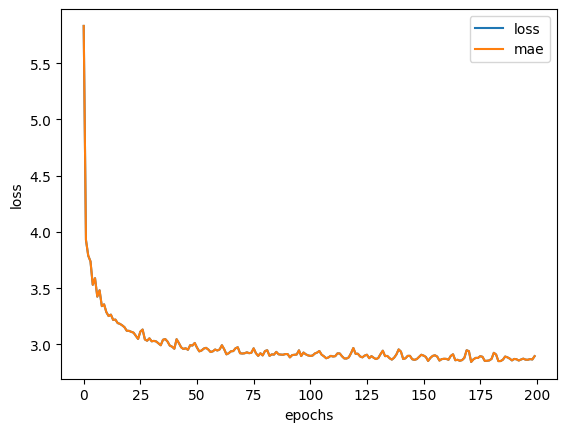

In [88]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 3

In [89]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(30),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 200, verbose=0)

In [90]:
model.evaluate(X_test3, y_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4169 - mae: 3.4169  


[3.322805166244507, 3.322805166244507]

In [91]:
model.summary();

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 30)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 27)                  │             837 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 26)                  │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 20)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,663 (45.56 KB)

 Trainable params: 3,887 (15.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,776 (30.38 KB)

Text(0.5, 0, 'epochs')

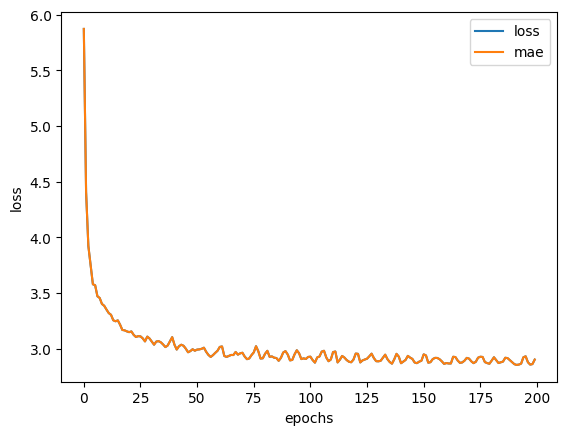

In [92]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# train_test_split(75-25)

### 1

In [93]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30),

                            tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 200, verbose=0)

In [94]:
model.evaluate(X_test4, y_test4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4888 - mae: 3.4888  


[3.376871347427368, 3.376871347427368]

In [95]:
model.summary();

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 30)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 28)                  │             868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 26)                  │             754 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 15)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,459 (44.77 KB)

 Trainable params: 3,819 (14.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,640 (29.85 KB)

Text(0.5, 0, 'epochs')

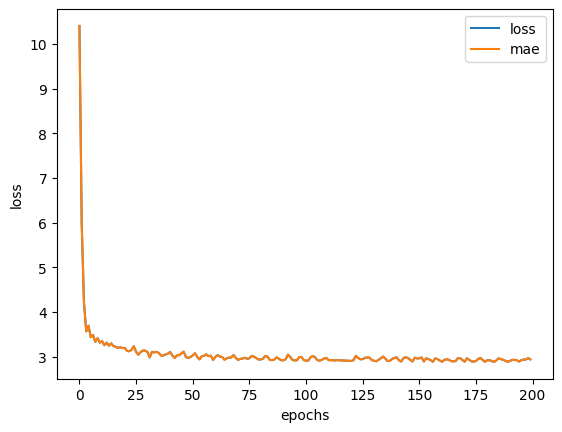

In [96]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 2

In [97]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(16),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 150, verbose=0)

In [98]:
model.evaluate(X_test4, y_test4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4422 - mae: 3.4422  


[3.337207794189453, 3.337207794189453]

In [99]:
model.summary();

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 27)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 18)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 5)                   │              85 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,609 (33.63 KB)

 Trainable params: 2,869 (11.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,740 (22.43 KB)

Text(0.5, 0, 'epochs')

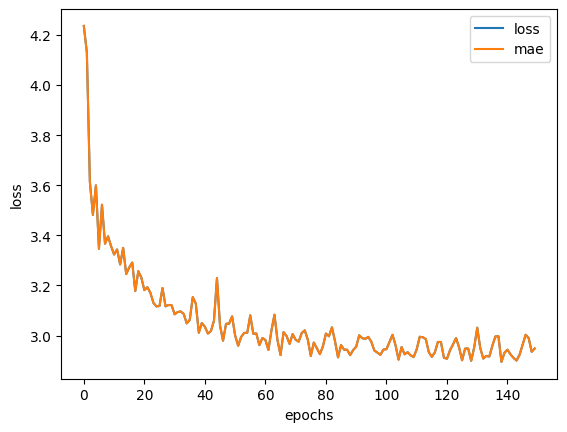

In [100]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 3

In [101]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(24),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 200, verbose=0)

In [102]:
model.evaluate(X_test4, y_test4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4170 - mae: 3.4170  


[3.3047192096710205, 3.3047192096710205]

In [103]:
model.summary();

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 27)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 24)                  │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,057 (43.20 KB)

 Trainable params: 3,685 (14.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,372 (28.80 KB)

Text(0.5, 0, 'epochs')

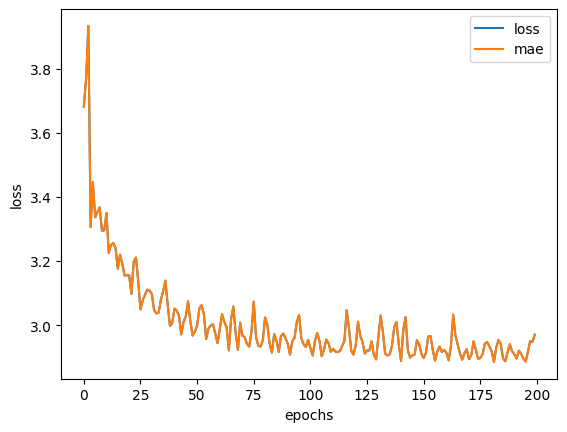

In [104]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# train_test_split(80-20)

## 1

In [105]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 200, verbose=0)

In [106]:
model.evaluate(X_test5, y_test5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6246 - mae: 3.6246  


[3.456749200820923, 3.456749200820923]

In [107]:
model.summary();

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 26)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 18)                  │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,884 (38.61 KB)

 Trainable params: 3,294 (12.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,590 (25.75 KB)

Text(0.5, 0, 'epochs')

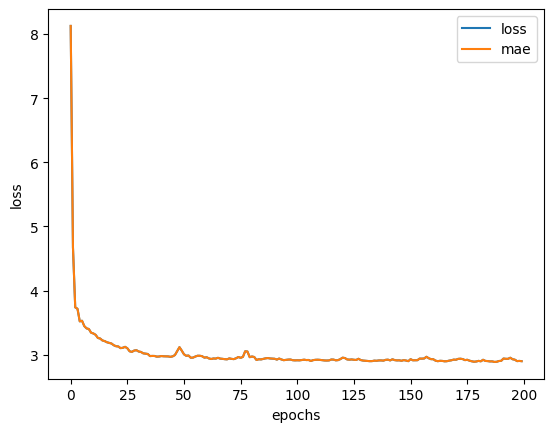

In [108]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 2

In [109]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 150, verbose=0)

In [110]:
model.evaluate(X_test5, y_test5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6113 - mae: 3.6113 


[3.4212937355041504, 3.4212937355041504]

In [111]:
model.summary();

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                     │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 27)                  │             783 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,364 (40.49 KB)

 Trainable params: 3,454 (13.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,910 (27.00 KB)

Text(0.5, 0, 'epochs')

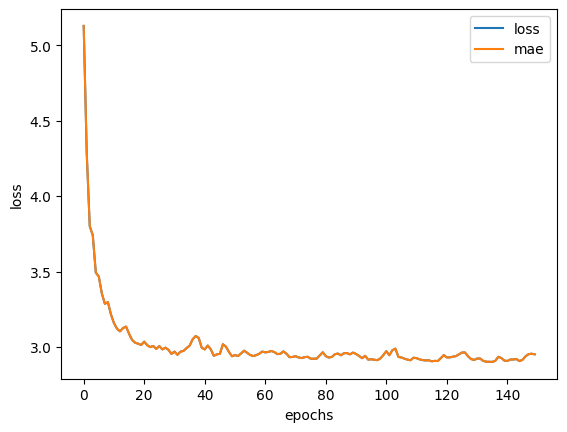

In [112]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 3

In [113]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(24),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 150, verbose=0)

In [114]:
model.evaluate(X_test5, y_test5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6747 - mae: 3.6747  


[3.5234436988830566, 3.5234436988830566]

In [115]:
model.summary();

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                     │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 27)                  │             783 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 23)                  │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 24)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,544 (41.19 KB)

 Trainable params: 3,514 (13.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,030 (27.46 KB)

Text(0.5, 0, 'epochs')

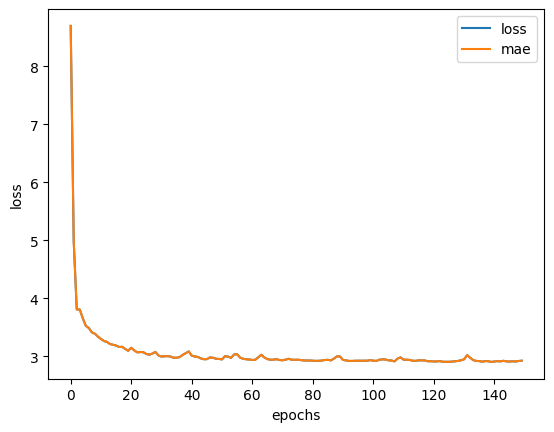

In [116]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# variance_inflation_factor

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

variables   VIF
0              school   1.6
1                 sex   3.1
2                 age  81.9
3             address   1.8
4             famsize   1.6
5             pstatus   1.3
6                Medu  21.3
7                Fedu  13.5
8          traveltime   6.7
9           studytime   9.4
10           failures   1.7
11          schoolsup   1.3
12             famsup   3.3
13               paid   2.4
14         activities   2.4
15            nursery   5.6
16             higher  22.8
17           internet   7.3
18           romantic   1.7
19             famrel  23.1
20           freetime  14.3
21              goout  12.7
22               Dalc   7.6
23               Walc   9.9
24             health   8.6
25           absences   1.8
26        Fjob_health   2.1
27         Fjob_other  12.6
28      Fjob_services   6.8
29       Fjob_teacher   2.8
30        Mjob_health   2.5
31         Mjob_other   4.2
32      Mjob_services   3.9
33       Mjob_teacher   3.7
34        reason_home   2.0
35       reason_other   1.4
36  reason_reputation   2.1
37    guardian_mother   4.8
38     guardian_other   1.8

In [21]:
calc_vif(X.drop('age', axis=1))

variables   VIF
0              school   1.5
1                 sex   3.0
2             address   1.8
3             famsize   1.6
4             pstatus   1.3
5                Medu  21.3
6                Fedu  13.3
7          traveltime   6.5
8           studytime   8.9
9            failures   1.7
10          schoolsup   1.3
11             famsup   3.3
12               paid   2.4
13         activities   2.4
14            nursery   5.4
15             higher  21.6
16           internet   7.2
17           romantic   1.7
18             famrel  20.6
19           freetime  13.8
20              goout  12.6
21               Dalc   7.6
22               Walc   9.8
23             health   8.3
24           absences   1.8
25        Fjob_health   2.1
26         Fjob_other  11.6
27      Fjob_services   6.3
28       Fjob_teacher   2.6
29        Mjob_health   2.5
30         Mjob_other   4.2
31      Mjob_services   3.9
32       Mjob_teacher   3.7
33        reason_home   1.9
34       reason_other   1.4
35  reason_reputation   2.1
36    guardian_mother   4.6
37     guardian_other   1.7

In [ ]:
calc_vif(X.drop(['age','higher'], axis=1))

variables   VIF
0              school   1.5
1                 sex   2.8
2             address   1.8
3             famsize   1.6
4             pstatus   1.3
5                Medu  21.2
6                Fedu  13.1
7          traveltime   6.5
8           studytime   8.6
9            failures   1.6
10          schoolsup   1.3
11             famsup   3.3
12               paid   2.4
13         activities   2.3
14            nursery   5.4
15           internet   7.1
16           romantic   1.7
17             famrel  20.1
18           freetime  13.6
19              goout  12.6
20               Dalc   7.6
21               Walc   9.8
22             health   8.2
23           absences   1.8
24        Fjob_health   2.0
25         Fjob_other  11.3
26      Fjob_services   6.2
27       Fjob_teacher   2.6
28        Mjob_health   2.5
29         Mjob_other   4.2
30      Mjob_services   3.8
31       Mjob_teacher   3.7
32        reason_home   1.9
33       reason_other   1.4
34  reason_reputation   2.1
35    guardian_mother   4.6
36     guardian_other   1.7

In [ ]:
calc_vif(X.drop(['age','higher','Medu'], axis=1))

variables   VIF
0              school   1.5
1                 sex   2.8
2             address   1.8
3             famsize   1.6
4             pstatus   1.3
5                Fedu   9.3
6          traveltime   6.5
7           studytime   8.4
8            failures   1.6
9           schoolsup   1.3
10             famsup   3.3
11               paid   2.4
12         activities   2.3
13            nursery   5.4
14           internet   7.1
15           romantic   1.7
16             famrel  20.1
17           freetime  13.6
18              goout  12.6
19               Dalc   7.5
20               Walc   9.7
21             health   8.1
22           absences   1.8
23        Fjob_health   2.0
24         Fjob_other  11.2
25      Fjob_services   6.2
26       Fjob_teacher   2.6
27        Mjob_health   2.0
28         Mjob_other   3.9
29      Mjob_services   3.3
30       Mjob_teacher   2.7
31        reason_home   1.9
32       reason_other   1.4
33  reason_reputation   2.0
34    guardian_mother   4.5
35     guardian_other   1.7

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel'], axis=1))

variables   VIF
0              school   1.5
1                 sex   2.8
2             address   1.8
3             famsize   1.6
4             pstatus   1.3
5                Fedu   9.1
6          traveltime   6.4
7           studytime   8.3
8            failures   1.6
9           schoolsup   1.3
10             famsup   3.3
11               paid   2.4
12         activities   2.3
13            nursery   5.4
14           internet   7.1
15           romantic   1.7
16           freetime  12.6
17              goout  12.4
18               Dalc   7.5
19               Walc   9.6
20             health   7.7
21           absences   1.8
22        Fjob_health   2.0
23         Fjob_other  10.6
24      Fjob_services   5.8
25       Fjob_teacher   2.6
26        Mjob_health   1.9
27         Mjob_other   3.9
28      Mjob_services   3.3
29       Mjob_teacher   2.7
30        reason_home   1.9
31       reason_other   1.4
32  reason_reputation   2.0
33    guardian_mother   4.5
34     guardian_other   1.7

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime'], axis=1))

variables   VIF
0              school   1.5
1                 sex   2.8
2             address   1.8
3             famsize   1.6
4             pstatus   1.3
5                Fedu   9.1
6          traveltime   6.4
7           studytime   8.3
8            failures   1.6
9           schoolsup   1.3
10             famsup   3.2
11               paid   2.4
12         activities   2.3
13            nursery   5.3
14           internet   7.0
15           romantic   1.7
16              goout  11.3
17               Dalc   7.3
18               Walc   9.6
19             health   7.5
20           absences   1.8
21        Fjob_health   2.0
22         Fjob_other  10.5
23      Fjob_services   5.7
24       Fjob_teacher   2.6
25        Mjob_health   1.9
26         Mjob_other   3.8
27      Mjob_services   3.3
28       Mjob_teacher   2.7
29        reason_home   1.9
30       reason_other   1.4
31  reason_reputation   2.0
32    guardian_mother   4.5
33     guardian_other   1.6

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout'], axis=1))

variables   VIF
0              school   1.5
1                 sex   2.8
2             address   1.7
3             famsize   1.6
4             pstatus   1.3
5                Fedu   9.0
6          traveltime   6.4
7           studytime   8.2
8            failures   1.6
9           schoolsup   1.3
10             famsup   3.2
11               paid   2.4
12         activities   2.3
13            nursery   5.3
14           internet   6.9
15           romantic   1.7
16               Dalc   7.3
17               Walc   8.3
18             health   7.5
19           absences   1.8
20        Fjob_health   2.0
21         Fjob_other  10.4
22      Fjob_services   5.7
23       Fjob_teacher   2.6
24        Mjob_health   1.9
25         Mjob_other   3.8
26      Mjob_services   3.3
27       Mjob_teacher   2.7
28        reason_home   1.9
29       reason_other   1.4
30  reason_reputation   2.0
31    guardian_mother   4.3
32     guardian_other   1.6

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other'], axis=1))

variables  VIF
0              school  1.5
1                 sex  2.8
2             address  1.7
3             famsize  1.6
4             pstatus  1.3
5                Fedu  8.7
6          traveltime  5.9
7           studytime  7.9
8            failures  1.6
9           schoolsup  1.3
10             famsup  3.2
11               paid  2.4
12         activities  2.3
13            nursery  5.3
14           internet  6.9
15           romantic  1.7
16               Dalc  7.2
17               Walc  7.9
18             health  7.2
19           absences  1.8
20        Fjob_health  1.3
21      Fjob_services  1.7
22       Fjob_teacher  1.5
23        Mjob_health  1.9
24         Mjob_other  3.5
25      Mjob_services  3.2
26       Mjob_teacher  2.6
27        reason_home  1.9
28       reason_other  1.4
29  reason_reputation  2.0
30    guardian_mother  4.0
31     guardian_other  1.6

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu'], axis=1))

variables  VIF
0              school  1.5
1                 sex  2.8
2             address  1.7
3             famsize  1.6
4             pstatus  1.2
5          traveltime  5.9
6           studytime  7.9
7            failures  1.5
8           schoolsup  1.3
9              famsup  3.2
10               paid  2.4
11         activities  2.2
12            nursery  5.1
13           internet  6.7
14           romantic  1.7
15               Dalc  7.2
16               Walc  7.7
17             health  7.1
18           absences  1.8
19        Fjob_health  1.2
20      Fjob_services  1.7
21       Fjob_teacher  1.3
22        Mjob_health  1.8
23         Mjob_other  3.4
24      Mjob_services  3.1
25       Mjob_teacher  2.5
26        reason_home  1.9
27       reason_other  1.4
28  reason_reputation  2.0
29    guardian_mother  4.0
30     guardian_other  1.6

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime'], axis=1))

variables  VIF
0              school  1.5
1                 sex  2.5
2             address  1.7
3             famsize  1.6
4             pstatus  1.2
5          traveltime  5.8
6            failures  1.5
7           schoolsup  1.3
8              famsup  3.2
9                paid  2.4
10         activities  2.2
11            nursery  4.9
12           internet  6.4
13           romantic  1.7
14               Dalc  7.2
15               Walc  7.7
16             health  6.9
17           absences  1.8
18        Fjob_health  1.2
19      Fjob_services  1.7
20       Fjob_teacher  1.3
21        Mjob_health  1.8
22         Mjob_other  3.4
23      Mjob_services  3.1
24       Mjob_teacher  2.5
25        reason_home  1.9
26       reason_other  1.4
27  reason_reputation  2.0
28    guardian_mother  4.0
29     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc'], axis=1))

variables  VIF
0              school  1.5
1                 sex  2.5
2             address  1.7
3             famsize  1.6
4             pstatus  1.2
5          traveltime  5.7
6            failures  1.5
7           schoolsup  1.3
8              famsup  3.1
9                paid  2.4
10         activities  2.2
11            nursery  4.9
12           internet  6.4
13           romantic  1.7
14               Dalc  4.5
15             health  6.8
16           absences  1.7
17        Fjob_health  1.2
18      Fjob_services  1.7
19       Fjob_teacher  1.3
20        Mjob_health  1.8
21         Mjob_other  3.4
22      Mjob_services  3.1
23       Mjob_teacher  2.5
24        reason_home  1.9
25       reason_other  1.4
26  reason_reputation  2.0
27    guardian_mother  4.0
28     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health'], axis=1))

variables  VIF
0              school  1.5
1                 sex  2.4
2             address  1.7
3             famsize  1.6
4             pstatus  1.2
5          traveltime  5.6
6            failures  1.5
7           schoolsup  1.3
8              famsup  3.1
9                paid  2.3
10         activities  2.2
11            nursery  4.8
12           internet  6.4
13           romantic  1.7
14               Dalc  4.3
15           absences  1.7
16        Fjob_health  1.2
17      Fjob_services  1.7
18       Fjob_teacher  1.3
19        Mjob_health  1.7
20         Mjob_other  3.2
21      Mjob_services  2.9
22       Mjob_teacher  2.5
23        reason_home  1.9
24       reason_other  1.4
25  reason_reputation  2.0
26    guardian_mother  3.9
27     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health','internet'], axis=1))

variables  VIF
0              school  1.5
1                 sex  2.4
2             address  1.7
3             famsize  1.6
4             pstatus  1.2
5          traveltime  5.4
6            failures  1.5
7           schoolsup  1.3
8              famsup  3.1
9                paid  2.3
10         activities  2.1
11            nursery  4.8
12           romantic  1.6
13               Dalc  4.2
14           absences  1.7
15        Fjob_health  1.2
16      Fjob_services  1.7
17       Fjob_teacher  1.3
18        Mjob_health  1.6
19         Mjob_other  2.9
20      Mjob_services  2.6
21       Mjob_teacher  2.2
22        reason_home  1.9
23       reason_other  1.4
24  reason_reputation  2.0
25    guardian_mother  3.9
26     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health','internet','traveltime'], axis=1))

variables  VIF
0              school  1.4
1                 sex  2.4
2             address  1.5
3             famsize  1.5
4             pstatus  1.2
5            failures  1.5
6           schoolsup  1.3
7              famsup  3.0
8                paid  2.3
9          activities  2.1
10            nursery  4.6
11           romantic  1.6
12               Dalc  4.0
13           absences  1.7
14        Fjob_health  1.2
15      Fjob_services  1.7
16       Fjob_teacher  1.3
17        Mjob_health  1.6
18         Mjob_other  2.8
19      Mjob_services  2.6
20       Mjob_teacher  2.2
21        reason_home  1.9
22       reason_other  1.4
23  reason_reputation  2.0
24    guardian_mother  3.8
25     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health','internet','traveltime','nursery'], axis=1))

variables  VIF
0              school  1.4
1                 sex  2.4
2             address  1.5
3             famsize  1.5
4             pstatus  1.2
5            failures  1.5
6           schoolsup  1.3
7              famsup  3.0
8                paid  2.3
9          activities  2.1
10           romantic  1.6
11               Dalc  4.0
12           absences  1.7
13        Fjob_health  1.2
14      Fjob_services  1.7
15       Fjob_teacher  1.3
16        Mjob_health  1.6
17         Mjob_other  2.7
18      Mjob_services  2.5
19       Mjob_teacher  2.2
20        reason_home  1.9
21       reason_other  1.4
22  reason_reputation  1.9
23    guardian_mother  3.7
24     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health','internet','traveltime','nursery','Dalc'], axis=1))

variables  VIF
0              school  1.4
1                 sex  2.3
2             address  1.5
3             famsize  1.5
4             pstatus  1.2
5            failures  1.4
6           schoolsup  1.3
7              famsup  2.9
8                paid  2.3
9          activities  2.1
10           romantic  1.6
11           absences  1.7
12        Fjob_health  1.2
13      Fjob_services  1.6
14       Fjob_teacher  1.3
15        Mjob_health  1.5
16         Mjob_other  2.4
17      Mjob_services  2.4
18       Mjob_teacher  2.1
19        reason_home  1.9
20       reason_other  1.3
21  reason_reputation  1.9
22    guardian_mother  3.6
23     guardian_other  1.5

In [ ]:
calc_vif(X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health','internet','traveltime','nursery','Dalc','guardian_mother'], axis=1))

variables  VIF
0              school  1.4
1                 sex  2.2
2             address  1.5
3             famsize  1.5
4             pstatus  1.2
5            failures  1.4
6           schoolsup  1.3
7              famsup  2.9
8                paid  2.3
9          activities  2.1
10           romantic  1.6
11           absences  1.7
12        Fjob_health  1.2
13      Fjob_services  1.6
14       Fjob_teacher  1.3
15        Mjob_health  1.5
16         Mjob_other  2.3
17      Mjob_services  2.3
18       Mjob_teacher  1.9
19        reason_home  1.8
20       reason_other  1.3
21  reason_reputation  1.9
22     guardian_other  1.3

In [49]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()

# Print the summary to get p-values
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              66.10
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                   3.44e-139
Time:                        14:48:22   Log-Likelihood:                         -1104.4
No. Observations:                 395   AIC:                                      2287.
Df Residuals:                     356   BIC:                                      2442.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [50]:
X_nomulti = X.drop(['age','higher','Medu','famrel','freetime','goout','Fjob_other','Fedu','studytime','Walc','health','internet','traveltime','nursery','Dalc','guardian_mother'], axis=1)

In [51]:
import statsmodels.api as sm

#X_train = sm.add_constant(X_train_nomulti)
model2 = sm.OLS(y, X_nomulti).fit()

# Print the summary to get p-values
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              69.58
Date:                Fri, 20 Dec 2024   Prob (F-statistic):                   1.57e-119
Time:                        14:48:25   Log-Likelihood:                         -1191.5
No. Observations:                 395   AIC:                                      2429.
Df Residuals:                     372   BIC:                                      2520.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [52]:
X_train_nomulti1, X_test_nomulti1, y_train_nomulti1, y_test_nomulti1 = train_test_split(X_nomulti, y, test_size=0.40, random_state=42)
X_train_nomulti2, X_test_nomulti2, y_train_nomulti2, y_test_nomulti2 = train_test_split(X_nomulti, y, test_size=0.35, random_state=42)
X_train_nomulti3, X_test_nomulti3, y_train_nomulti3, y_test_nomulti3 = train_test_split(X_nomulti, y, test_size=0.30, random_state=42)
X_train_nomulti4, X_test_nomulti4, y_train_nomulti4, y_test_nomulti4 = train_test_split(X_nomulti, y, test_size=0.25, random_state=42)
X_train_nomulti5, X_test_nomulti5, y_train_nomulti5, y_test_nomulti5 = train_test_split(X_nomulti, y, test_size=0.20, random_state=42)

## Linear_Regression

train_test_split(60-40)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_nomulti1, y_train_nomulti1)
y_pred_nomulti1 = lm2.predict(X_test_nomulti1)
print(np.sqrt(metrics.mean_squared_error(y_test_nomulti1, y_pred_nomulti1)))

4.384405016624924


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

0.12446856810181994

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

3.4017216651776176

train_test_split(65-35)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_nomulti2, y_train_nomulti2)
y_pred_nomulti2 = lm2.predict(X_test_nomulti2)
print(np.sqrt(metrics.mean_squared_error(y_test_nomulti2, y_pred_nomulti2)))

4.500742103132612


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

0.1332843832085875

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

3.4824518029674043

train_test_split(70-30)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_nomulti3, y_train_nomulti3)
y_pred_nomulti3 = lm2.predict(X_test_nomulti3)
print(np.sqrt(metrics.mean_squared_error(y_test_nomulti3, y_pred_nomulti3)))

4.302298863475634


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

0.15796005304891614

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

3.3418950927835365

train_test_split(75-25)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_nomulti4, y_train_nomulti4)
y_pred_nomulti4 = lm2.predict(X_test_nomulti4)
print(np.sqrt(metrics.mean_squared_error(y_test_nomulti4, y_pred_nomulti4)))

4.238416134368614


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

0.22023241013279926

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

3.3509734157619775

train_test_split(80-20)

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train_nomulti5, y_train_nomulti5)
y_pred_nomulti5 = lm2.predict(X_test_nomulti5)
print(np.sqrt(metrics.mean_squared_error(y_test_nomulti5, y_pred_nomulti5)))

4.154977046208649


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)

0.15806903398818517

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

3.3080695413122254

## KNN

train_test_split(60-40)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train_nomulti1, y_train_nomulti1)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred_nomulti1 = model.predict(X_test_nomulti1)

In [ ]:
y_pred_nomulti1

array([[ 7.        ],
       [12.14285714],
       [11.66666667],
       [12.04761905],
       [11.33333333],
       [11.0952381 ],
       [12.42857143],
       [10.52380952],
       [ 9.52380952],
       [12.33333333],
       [ 9.66666667],
       [12.61904762],
       [10.52380952],
       [ 9.76190476],
       [12.19047619],
       [11.95238095],
       [ 8.71428571],
       [12.14285714],
       [ 9.04761905],
       [ 7.61904762],
       [10.95238095],
       [11.38095238],
       [ 8.42857143],
       [11.57142857],
       [ 9.38095238],
       [11.57142857],
       [10.0952381 ],
       [ 9.66666667],
       [ 8.52380952],
       [11.80952381],
       [10.28571429],
       [11.38095238],
       [ 9.85714286],
       [11.85714286],
       [ 9.14285714],
       [11.19047619],
       [ 2.95238095],
       [11.85714286],
       [12.23809524],
       [10.76190476],
       [ 8.0952381 ],
       [ 9.28571429],
       [11.28571429],
       [11.76190476],
       [11.52380952],
       [ 8

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

0.18011089165781902

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

3.41500904159132

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti1,y_pred_nomulti1)

18.001334711099627

In [ ]:
mse = mean_squared_error(y_test_nomulti1, y_pred_nomulti1)
rmse = np.sqrt(mse)
rmse

4.242797981415051

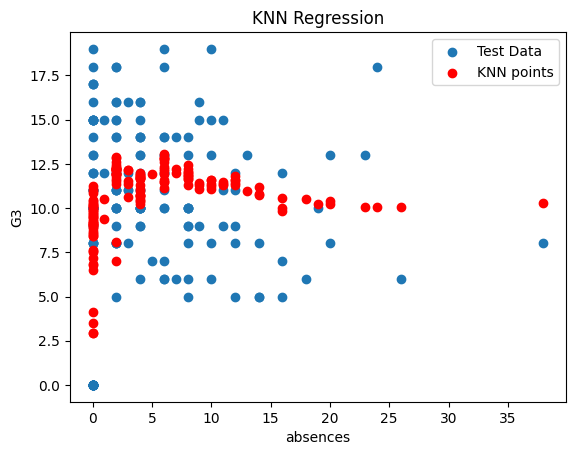

In [ ]:
plt.scatter(X_test1['absences'], y_test_nomulti1, label='Test Data')
plt.scatter(X_test1['absences'], y_pred_nomulti1, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(65-35)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train_nomulti2, y_train_nomulti2)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred_nomulti2 = model.predict(X_test_nomulti2)

In [ ]:
y_pred_nomulti2

array([[ 6.19047619],
       [11.61904762],
       [11.66666667],
       [12.04761905],
       [11.28571429],
       [11.47619048],
       [13.        ],
       [10.52380952],
       [ 9.71428571],
       [12.42857143],
       [11.19047619],
       [12.80952381],
       [10.76190476],
       [10.23809524],
       [12.19047619],
       [11.66666667],
       [ 9.23809524],
       [12.04761905],
       [ 9.47619048],
       [ 8.0952381 ],
       [10.52380952],
       [12.33333333],
       [ 9.14285714],
       [11.23809524],
       [ 9.42857143],
       [11.71428571],
       [10.52380952],
       [10.14285714],
       [ 8.66666667],
       [11.76190476],
       [10.04761905],
       [12.28571429],
       [10.95238095],
       [11.28571429],
       [10.04761905],
       [10.95238095],
       [ 3.76190476],
       [11.85714286],
       [12.14285714],
       [10.47619048],
       [ 8.42857143],
       [10.0952381 ],
       [11.        ],
       [11.9047619 ],
       [11.66666667],
       [ 7

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

0.16585316607904665

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

3.6019184652278176

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti2,y_pred_nomulti2)

19.495489322827453

In [ ]:
mse = mean_squared_error(y_test_nomulti2, y_pred_nomulti2)
rmse = np.sqrt(mse)
rmse

4.4153696700081015

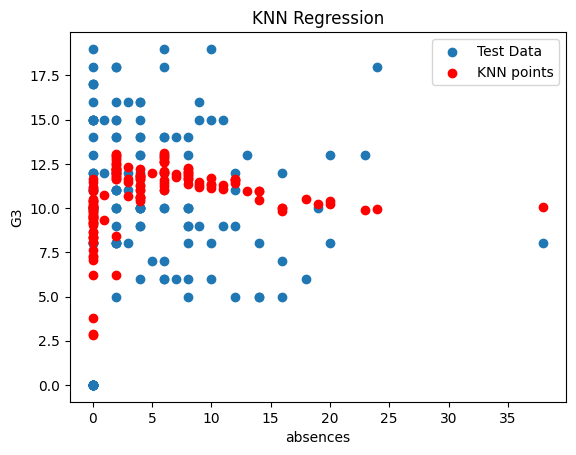

In [ ]:
plt.scatter(X_test2['absences'], y_test_nomulti2, label='Test Data')
plt.scatter(X_test2['absences'], y_pred_nomulti2, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(70-30)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train_nomulti3, y_train_nomulti3)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred_nomulti3 = model.predict(X_test_nomulti3)

In [ ]:
y_pred_nomulti3

array([[ 5.66666667],
       [12.23809524],
       [11.71428571],
       [12.33333333],
       [11.28571429],
       [10.95238095],
       [12.66666667],
       [10.66666667],
       [ 9.76190476],
       [12.38095238],
       [10.42857143],
       [12.85714286],
       [10.95238095],
       [10.0952381 ],
       [12.52380952],
       [11.0952381 ],
       [ 9.19047619],
       [12.04761905],
       [ 9.52380952],
       [ 8.28571429],
       [10.61904762],
       [12.19047619],
       [ 9.14285714],
       [11.57142857],
       [ 8.61904762],
       [11.61904762],
       [ 9.95238095],
       [ 9.57142857],
       [ 8.76190476],
       [11.85714286],
       [10.38095238],
       [11.57142857],
       [10.57142857],
       [11.57142857],
       [ 8.95238095],
       [11.04761905],
       [ 3.        ],
       [12.        ],
       [12.28571429],
       [10.52380952],
       [ 8.28571429],
       [ 9.42857143],
       [11.04761905],
       [11.52380952],
       [11.52380952],
       [ 8

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

0.1405072544467576

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

3.549419767907163

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti3,y_pred_nomulti3)

18.893424036281175

In [ ]:
mse = mean_squared_error(y_test_nomulti3, y_pred_nomulti3)
rmse = np.sqrt(mse)
rmse

4.3466566503786765

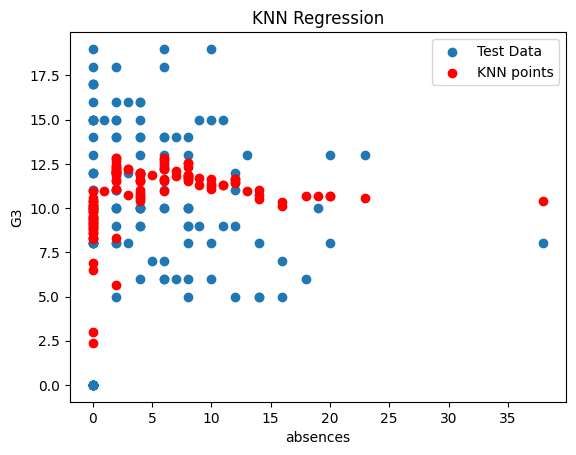

In [ ]:
plt.scatter(X_test3['absences'], y_test_nomulti3, label='Test Data')
plt.scatter(X_test3['absences'], y_pred_nomulti3, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(75-25)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train_nomulti4, y_train_nomulti4)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred_nomulti4 = model.predict(X_test_nomulti4)

In [ ]:
y_pred_nomulti4

array([[ 5.66666667],
       [12.61904762],
       [12.19047619],
       [12.52380952],
       [10.76190476],
       [10.42857143],
       [12.57142857],
       [10.57142857],
       [ 8.9047619 ],
       [11.9047619 ],
       [ 9.80952381],
       [12.71428571],
       [11.28571429],
       [ 9.76190476],
       [12.76190476],
       [11.        ],
       [ 9.61904762],
       [11.85714286],
       [ 9.33333333],
       [ 6.61904762],
       [10.33333333],
       [11.9047619 ],
       [ 8.95238095],
       [11.61904762],
       [ 9.19047619],
       [11.33333333],
       [ 9.80952381],
       [ 8.28571429],
       [ 9.71428571],
       [12.0952381 ],
       [10.14285714],
       [11.9047619 ],
       [ 9.66666667],
       [11.66666667],
       [ 9.23809524],
       [10.66666667],
       [ 2.42857143],
       [11.66666667],
       [12.38095238],
       [ 9.85714286],
       [ 8.23809524],
       [ 8.52380952],
       [10.80952381],
       [11.61904762],
       [11.23809524],
       [ 8

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

0.16546335444281624

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

3.6320346320346313

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti4,y_pred_nomulti4)

19.225932797361367

In [ ]:
mse = mean_squared_error(y_test_nomulti4, y_pred_nomulti4)
rmse = np.sqrt(mse)
rmse

4.384738623608181

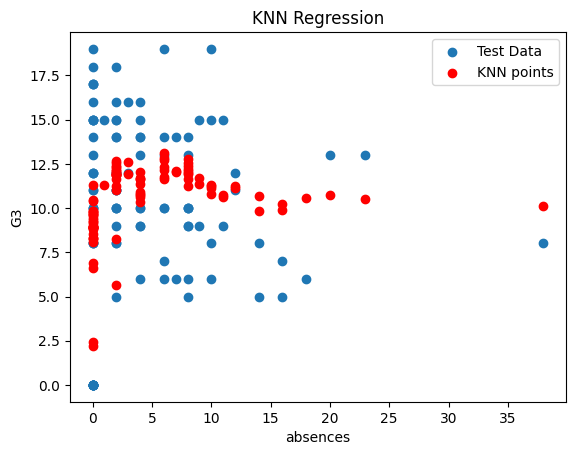

In [ ]:
plt.scatter(X_test4['absences'], y_test_nomulti4, label='Test Data')
plt.scatter(X_test4['absences'], y_pred_nomulti4, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

train_test_split(80-20)

In [ ]:
model=KNeighborsRegressor(n_neighbors=21)

In [ ]:
model.fit(X_train_nomulti5, y_train_nomulti5)

KNeighborsRegressor(n_neighbors=21)

In [ ]:
y_pred_nomulti5 = model.predict(X_test_nomulti5)

In [ ]:
y_pred_nomulti5

array([[ 5.19047619],
       [12.19047619],
       [12.38095238],
       [12.57142857],
       [10.61904762],
       [11.19047619],
       [12.0952381 ],
       [10.47619048],
       [ 8.76190476],
       [12.23809524],
       [11.80952381],
       [12.52380952],
       [10.66666667],
       [ 9.52380952],
       [12.19047619],
       [11.14285714],
       [ 9.61904762],
       [11.95238095],
       [ 8.42857143],
       [ 7.28571429],
       [10.71428571],
       [12.42857143],
       [ 8.42857143],
       [11.85714286],
       [ 8.66666667],
       [11.19047619],
       [ 9.57142857],
       [ 8.28571429],
       [ 9.23809524],
       [11.95238095],
       [10.28571429],
       [11.95238095],
       [10.42857143],
       [11.71428571],
       [ 9.33333333],
       [10.47619048],
       [ 1.95238095],
       [11.76190476],
       [12.57142857],
       [ 9.85714286],
       [ 7.9047619 ],
       [ 9.52380952],
       [11.04761905],
       [11.80952381],
       [11.33333333],
       [ 8

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)

0.08260551326668497

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

3.613019891500904

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti5,y_pred_nomulti5)

18.811217313929788

In [ ]:
mse = mean_squared_error(y_test_nomulti5, y_pred_nomulti5)
rmse = np.sqrt(mse)
rmse

4.337190025111856

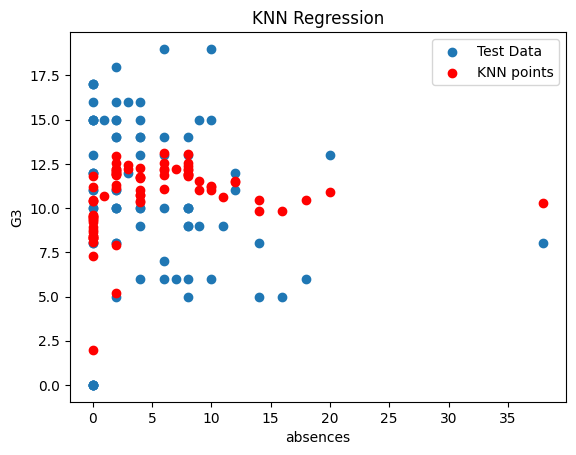

In [ ]:
plt.scatter(X_test5['absences'], y_test_nomulti5, label='Test Data')
plt.scatter(X_test5['absences'], y_pred_nomulti5, color='red', linewidth=1, label='KNN points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('KNN Regression')
plt.legend()
plt.show()

## SVM

train_test_split(60-40)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train_nomulti1, y_train_nomulti1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_nomulti1 = model.predict(X_test_nomulti1)

In [ ]:
y_pred_nomulti1

array([ 4.18858468, 10.56718292,  8.73647662, 12.77151074, 10.14177715,
       11.43743045, 12.32574742, 11.33750272, 12.05404584, 12.45833402,
       11.56488576, 10.55710924, 10.89794129, 11.78102702, 11.55449626,
       11.12277547, 12.30465678, 11.38317161, 11.14610827, 10.75270943,
       11.30071738, 12.41199274, 13.7872668 , 11.30968783,  9.06630045,
       11.47787808, 13.31449202, 12.67828696, 12.12201683, 11.27150368,
       10.25809049, 10.07342077, 13.54178716,  9.47319385, 11.03600026,
        9.47391983,  8.77330323, 10.60225917, 12.72699054,  7.63994067,
        5.74230576, 11.62883238, 11.64456832,  8.6538609 , 10.959123  ,
       10.43556992, 10.39255721,  9.54274767, 10.73721773, 12.89386635,
        9.73371612, 12.88766979, 12.92004047, 11.37450839, 10.05347608,
       10.55542687, 13.66170252, 11.0493419 , 11.82221211, 11.93156763,
       12.09633009, 11.06302156,  4.14807779, 12.67277086,  9.46317437,
       11.54347908, 11.0529542 , 11.49429263, 11.43832961, 13.05

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

0.12163172269563127

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

3.3252752247868367

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti1,y_pred_nomulti1)

19.285292606629987

In [ ]:
mse = mean_squared_error(y_test_nomulti1, y_pred_nomulti1)
rmse = np.sqrt(mse)
rmse

4.391502317730231

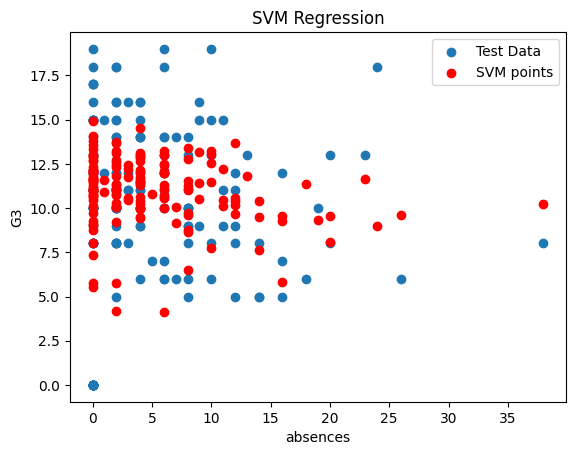

In [ ]:
plt.scatter(X_test1['absences'], y_test_nomulti1, label='Test Data')
plt.scatter(X_test1['absences'], y_pred_nomulti1, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(65-35)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train_nomulti2, y_train_nomulti2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_nomulti2 = model.predict(X_test_nomulti2)

In [ ]:
y_pred_nomulti2

array([ 4.15715922, 10.95821923,  8.89226654, 13.21022714,  9.62612747,
       11.13496607, 11.43676817, 10.86477265, 11.9046091 , 12.00777047,
       11.27704195, 11.66607352, 10.59486432, 11.51055926, 11.05979516,
       11.18101329, 12.34646785, 11.11283033, 10.65226064, 10.74656089,
       10.8739672 , 11.77984429, 13.54187131, 10.83139535,  9.23731254,
       11.21844789, 13.79290269, 12.22375051, 11.75453531, 11.13479412,
       10.5673813 , 10.03755092, 13.52893898, 10.07360115, 11.20513816,
        9.32032274,  8.98983234, 10.41338955, 12.69220115,  7.26673557,
        6.84712711, 11.48931571, 11.61305537,  8.46618791, 10.79036002,
       10.44984297, 10.06983658,  9.28965443, 11.02077889, 11.74575781,
       10.45006689, 13.10034326, 12.33036953, 11.56491158, 11.20513358,
       10.63857473, 13.66074022, 10.88710069, 11.6084853 , 11.83396182,
       11.43955277, 11.19767091,  4.30796144, 12.63021076,  9.05415086,
       11.58609644, 10.53812646, 11.19145404, 11.6965311 , 12.94

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

0.08502450755169022

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

3.5399395727272855

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti2,y_pred_nomulti2)

21.384598272496945

In [ ]:
mse = mean_squared_error(y_test_nomulti2, y_pred_nomulti2)
rmse = np.sqrt(mse)
rmse

4.624348415992998

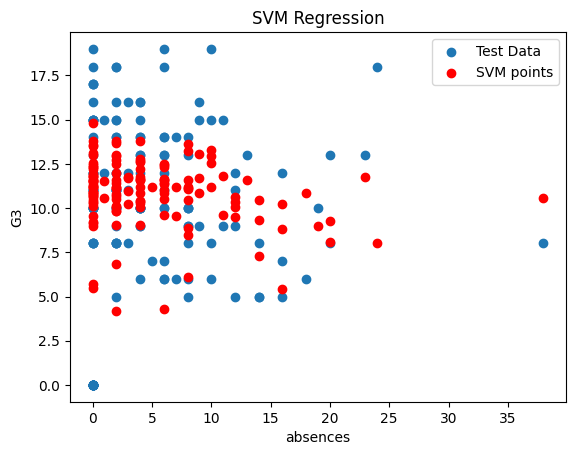

In [ ]:
plt.scatter(X_test2['absences'], y_test_nomulti2, label='Test Data')
plt.scatter(X_test2['absences'], y_pred_nomulti2, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(70-30)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train_nomulti3, y_train_nomulti3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_nomulti3 = model.predict(X_test_nomulti3)

In [ ]:
y_pred_nomulti3

array([ 3.55011948, 10.59028187,  9.05618302, 12.75825328,  9.73726335,
       11.06738255, 12.22730453, 10.92474149, 11.92148355, 12.37477198,
       11.09865276, 11.1412845 , 11.05936378, 12.10754576, 11.30401066,
       11.20003665, 12.22133928, 11.16903102, 11.16323994, 11.15179401,
       11.12447895, 12.34281385, 13.54926238, 11.44627437,  9.32830937,
       11.72584568, 13.44758949, 12.63562496, 12.18667938, 11.39951545,
       10.35607802, 10.2901502 , 13.36560389,  9.73114533, 10.92116121,
        9.1468504 ,  8.86914384, 10.23620276, 12.71785144,  7.09871393,
        6.18369978, 11.51790844, 11.84870423,  8.3752081 , 11.31394559,
       10.32195759, 10.36408319,  9.39991349, 10.73684439, 12.77231928,
        9.9760884 , 12.83877337, 12.39530565, 11.66433999, 10.479739  ,
       10.78277423, 13.53128064, 10.81143058, 12.00723664, 11.94273834,
       11.57708118, 11.40866916,  4.0577152 , 12.65532125,  9.32799602,
       11.68678637, 10.68695481, 11.34249662, 11.3324085 , 12.84

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

0.11970808465900495

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

3.4025655520869535

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti3,y_pred_nomulti3)

19.350632705505802

In [ ]:
mse = mean_squared_error(y_test_nomulti3, y_pred_nomulti3)
rmse = np.sqrt(mse)
rmse

4.398935405925598

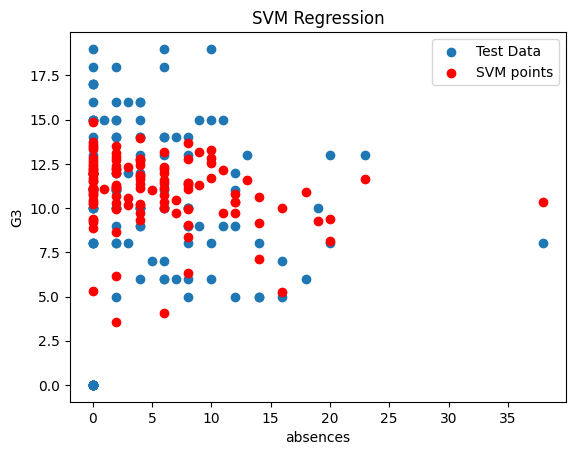

In [ ]:
plt.scatter(X_test3['absences'], y_test_nomulti3, label='Test Data')
plt.scatter(X_test3['absences'], y_pred_nomulti3, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(75-25)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train_nomulti4, y_train_nomulti4)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_nomulti4 = model.predict(X_test_nomulti4)

In [ ]:
y_pred_nomulti4

array([ 3.73413087, 10.88678634,  9.38521388, 12.69579441, 10.40902981,
       11.14004174, 11.45264482, 11.35018835, 11.67562421, 11.75564484,
       11.10324117, 11.25821567, 10.99140749, 11.99625801, 11.1600419 ,
       10.73381117, 12.24467289, 11.3779139 , 10.88574568, 10.35650906,
       10.80464263, 12.60192163, 13.45499367, 10.42811316,  9.48095693,
       11.81662479, 13.41106009, 12.3928628 , 11.5655976 , 11.25094793,
       11.26655353, 10.23330799, 13.22574558, 10.10008187, 11.09044231,
        9.4425599 ,  8.80295388, 10.64328074, 12.44595272,  7.60422613,
        6.24003207, 11.59074449, 11.56558863,  8.774993  , 10.64447255,
       10.63537284, 10.78845266,  9.66073584, 10.79666513, 12.0990962 ,
        9.59373314, 12.88508267, 12.35036251, 11.99132309, 10.87469821,
       10.9867861 , 13.42081831, 10.84903761, 11.93918906, 11.92718029,
       11.94463817, 11.33935834,  3.74044492, 12.40611152,  9.86265956,
       11.63617616, 10.39137348, 11.96001855, 11.37909486, 12.99

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

0.1580951785125444

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

3.496414611703838

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti4,y_pred_nomulti4)

19.39567975338624

In [ ]:
mse = mean_squared_error(y_test_nomulti4, y_pred_nomulti4)
rmse = np.sqrt(mse)
rmse

4.404052651068813

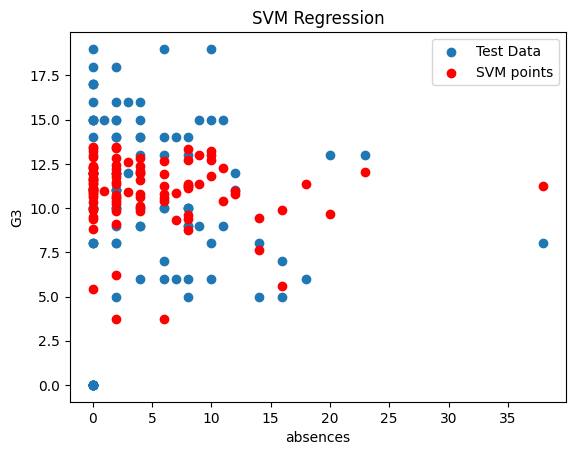

In [ ]:
plt.scatter(X_test4['absences'], y_test_nomulti4, label='Test Data')
plt.scatter(X_test4['absences'], y_pred_nomulti4, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

train_test_split(80-20)

In [ ]:
model = SVR(kernel='linear')

In [ ]:
model.fit(X_train_nomulti5, y_train_nomulti5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_nomulti5 = model.predict(X_test_nomulti5)

In [ ]:
y_pred_nomulti5

array([ 3.51305148, 10.62567381,  9.44201053, 12.42739482, 10.79576176,
       11.12094758, 11.80728925, 11.63349093, 11.8866703 , 11.66866224,
       11.05610604, 10.84684694, 11.19779469, 12.30479751, 11.10100433,
       10.67331145, 11.90384128, 11.45457904, 10.8669751 , 10.3128113 ,
       10.87198486, 12.78628213, 13.0723222 , 10.64043763,  9.38363418,
       11.84628463, 12.94277605, 12.4693985 , 11.5642744 , 11.10081411,
       11.06986669, 10.05758781, 12.98136575,  9.60605327, 10.88908192,
        9.28356795,  8.74359734, 10.37284295, 12.20297122,  7.60278888,
        5.89533931, 11.49926816, 11.32732067,  8.80273319, 10.70363966,
       10.2688131 , 11.07519739,  9.7096639 , 10.73781157, 12.2831678 ,
        9.56213912, 12.95438354, 12.2894285 , 11.70160974, 10.38244316,
       11.16155078, 13.153631  , 10.77395006, 11.86548592, 11.94667914,
       12.23122394, 11.4922421 ,  3.5927056 , 12.18196051,  9.64993781,
       11.59968162, 10.57873149, 11.71334685, 11.31240386, 13.28

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)

0.12644391931022514

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

3.372392772266595

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti5,y_pred_nomulti5)

17.912308725850327

In [ ]:
mse = mean_squared_error(y_test_nomulti5, y_pred_nomulti5)
rmse = np.sqrt(mse)
rmse

4.232293553837012

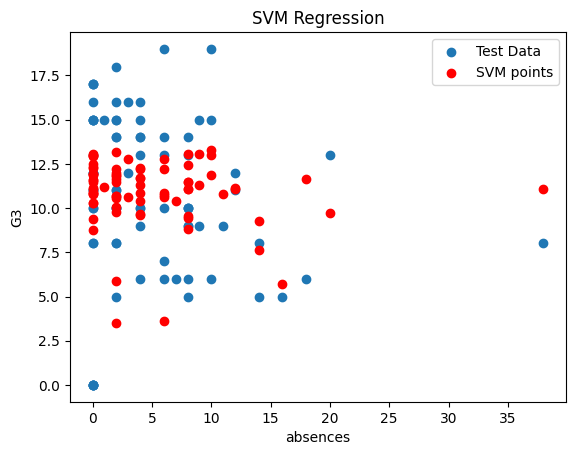

In [ ]:
plt.scatter(X_test5['absences'], y_test_nomulti5, label='Test Data')
plt.scatter(X_test5['absences'], y_pred_nomulti5, color='red', linewidth=1, label='SVM points')
plt.xlabel('absences')
plt.ylabel('G3')
plt.title('SVM Regression')
plt.legend()
plt.show()

## Decision_Trees

train_test_split(60-40)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train_nomulti1,y_train_nomulti1)

In [ ]:
y_pred_nomulti1 = clf.predict(X_test_nomulti1)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

-0.19832148949562578

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

3.8037974683544302

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti1,y_pred_nomulti1)

26.310126582278482

In [ ]:
mse = mean_squared_error(y_test_nomulti1, y_pred_nomulti1)
rmse = np.sqrt(mse)
rmse

5.129339780349756

train_test_split(65-35)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train_nomulti2,y_train_nomulti2)

In [ ]:
y_pred_nomulti2 = clf.predict(X_test_nomulti2)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

-0.18325117480058295

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

3.8129496402877696

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti2,y_pred_nomulti2)

27.654676258992804

In [ ]:
mse = mean_squared_error(y_test_nomulti2, y_pred_nomulti2)
rmse = np.sqrt(mse)
rmse

5.25877136401582

train_test_split(70-30)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train_nomulti3,y_train_nomulti3)

In [ ]:
y_pred_nomulti3 = clf.predict(X_test_nomulti3)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

-0.03541254401069094

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

3.4705882352941178

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti3,y_pred_nomulti3)

22.76050420168067

In [ ]:
mse = mean_squared_error(y_test_nomulti3, y_pred_nomulti3)
rmse = np.sqrt(mse)
rmse

4.770797019543031

train_test_split(75-25)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train_nomulti4,y_train_nomulti4)

In [ ]:
y_pred_nomulti4 = clf.predict(X_test_nomulti4)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

-0.16990154742818664

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

3.9444444444444446

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti4,y_pred_nomulti4)

26.9520202020202

In [ ]:
mse = mean_squared_error(y_test_nomulti4, y_pred_nomulti4)
rmse = np.sqrt(mse)
rmse

5.191533511595606

train_test_split(80-20)

In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train_nomulti5,y_train_nomulti5)

In [ ]:
y_pred_nomulti5 = clf.predict(X_test_nomulti5)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)

-0.17183251023661406

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

3.6772151898734178

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti5,y_pred_nomulti5)

24.02848101265823

In [ ]:
mse = mean_squared_error(y_test_nomulti5, y_pred_nomulti5)
rmse = np.sqrt(mse)
rmse

4.9018854548692

## RandomForest

train_test_split(60-40)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_nomulti1, y_train_nomulti1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred_nomulti1 = rf.predict(X_test_nomulti1)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

0.26443903991307427

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

3.134565400843882

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti1,y_pred_nomulti1)

16.149841372714484

In [ ]:
mse = mean_squared_error(y_test_nomulti1, y_pred_nomulti1)
rmse = np.sqrt(mse)
rmse

4.018686523320087

train_test_split(65-35)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_nomulti2, y_train_nomulti2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred_nomulti2= rf.predict(X_test_nomulti2)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

0.2997016173956606

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

3.1732278177458033

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti2,y_pred_nomulti2)

16.367213883293367

In [ ]:
mse = mean_squared_error(y_test_nomulti2, y_pred_nomulti2)
rmse = np.sqrt(mse)
rmse

4.0456413438778

train_test_split(70-30)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_nomulti3, y_train_nomulti3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred_nomulti3 = rf.predict(X_test_nomulti3)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

0.24655596448196437

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

3.1679658863545415

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti3,y_pred_nomulti3)

16.562254567356703

In [ ]:
mse = mean_squared_error(y_test_nomulti3, y_pred_nomulti3)
rmse = np.sqrt(mse)
rmse

4.069674995298359

train_test_split(75-25)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_nomulti4, y_train_nomulti4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred_nomulti4 = rf.predict(X_test_nomulti4)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

0.35321927671753084

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

3.0077775372775375

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti4,y_pred_nomulti4)

14.9004394074933

In [ ]:
mse = mean_squared_error(y_test_nomulti4, y_pred_nomulti4)
rmse = np.sqrt(mse)
rmse

3.860108730009208

train_test_split(80-20)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_nomulti5, y_train_nomulti5)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred_nomulti5 = rf.predict(X_test_nomulti5)

Evaluation Metric

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)

0.210007402297421

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

3.094377637130802

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti5,y_pred_nomulti5)

16.198835557313647

In [ ]:
mse = mean_squared_error(y_test_nomulti5, y_pred_nomulti5)
rmse = np.sqrt(mse)
rmse

4.024777702844425

## Adaboost

train_test_split(60-40)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train_nomulti1, y_train_nomulti1)

y_pred_nomulti1 = model.predict(X_test_nomulti1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

r2_score


0.17033888635291783

In [ ]:

print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

mean_absolute_error


3.4913440279360306

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti1,y_pred_nomulti1)
mse = mean_squared_error(y_test_nomulti1, y_pred_nomulti1)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.268007388137377

train_test_split(65-35)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train_nomulti2, y_train_nomulti2)

y_pred_nomulti2 = model.predict(X_test_nomulti2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

r2_score


0.15890111826906295

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

mean_absolute_error


3.6198765134693707

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti2,y_pred_nomulti2)
mse = mean_squared_error(y_test_nomulti2, y_pred_nomulti2)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.433731046954067

train_test_split(70-30)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train_nomulti3, y_train_nomulti3)

y_pred_nomulti3 = model.predict(X_test_nomulti3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

r2_score


0.10139272945514399

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

mean_absolute_error


3.634020444633534

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti3,y_pred_nomulti3)
mse = mean_squared_error(y_test_nomulti3, y_pred_nomulti3)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.444461947754721

train_test_split(75-25)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train_nomulti4, y_train_nomulti4)

y_pred_nomulti4 = model.predict(X_test_nomulti4)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

r2_score


0.18656557302168775

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

mean_absolute_error


3.5968459095747316

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti4,y_pred_nomulti4)
mse = mean_squared_error(y_test_nomulti4, y_pred_nomulti4)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.328947098527883

train_test_split(80-20)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostRegressor(n_estimators=50, random_state=42)

model.fit(X_train_nomulti5, y_train_nomulti5)

y_pred_nomulti5 = model.predict(X_test_nomulti5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)


r2_score


0.10450095719187291

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

mean_absolute_error


3.5609380056766327

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti5,y_pred_nomulti5)
mse = mean_squared_error(y_test_nomulti5, y_pred_nomulti5)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.28511962508499

# xgboost

train_test_split(60-40)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train_nomulti1, y_train_nomulti1)

y_pred_nomulti1 = model.predict(X_test_nomulti1)
y_pred_nomulti1


array([ 8.093872  , 10.714329  ,  9.694656  , 12.2817745 , 10.505535  ,
       14.742049  , 18.250437  ,  9.760869  ,  6.835826  , 16.954683  ,
       14.417549  , 10.74188   , 12.64991   ,  8.234935  , 10.949106  ,
       11.661811  ,  3.7443392 ,  9.200595  ,  2.452553  ,  5.544764  ,
       12.009662  , 13.361864  ,  6.783842  , 13.267238  , 10.659863  ,
        8.280174  ,  9.344078  ,  8.680043  ,  7.6143775 , 11.011279  ,
       11.697366  ,  8.95032   , 15.163484  ,  9.403068  ,  0.2110679 ,
       10.481615  ,  0.9292645 , 14.55537   , 15.985323  ,  7.879984  ,
        6.486625  , 10.549282  , 12.864415  ,  9.322043  ,  6.6906176 ,
       11.832283  , 11.90649   , 10.409264  , 12.195946  , 19.301025  ,
        9.430313  , 12.883519  , 15.376631  , 10.020073  , 10.128059  ,
       10.348202  , 15.144296  ,  6.676642  ,  6.95765   , 15.184529  ,
       14.310593  , 11.664093  ,  7.077626  , 16.568762  , 10.981398  ,
        7.8916287 , 10.661986  , 10.463084  , 10.73771   , 11.04

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti1,y_pred_nomulti1)

r2_score


0.02418208122253418

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti1,y_pred_nomulti1)

mean_absolute_error


3.4651776094791256

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti1,y_pred_nomulti1)
mse = mean_squared_error(y_test_nomulti1, y_pred_nomulti1)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.62870171707907

train_test_split(65-35)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train_nomulti2, y_train_nomulti2)

y_pred_nomulti2 = model.predict(X_test_nomulti2)
y_pred_nomulti2

array([ 9.219388  , 10.132065  ,  9.319494  , 12.082647  ,  6.950274  ,
       14.869198  , 17.154501  ,  9.663517  ,  7.21046   , 16.949688  ,
       14.175011  , 11.534619  , 15.347266  , 10.365551  , 11.24815   ,
       11.548921  ,  4.8512783 ,  9.013444  ,  4.8670683 ,  4.789255  ,
       10.2083435 , 14.911652  ,  8.572426  , 11.356393  , 12.204508  ,
        9.144522  , 10.955187  ,  9.703465  ,  4.2430854 , 10.111767  ,
        9.22631   , 11.437158  , 14.432788  ,  8.738413  ,  0.15088415,
       11.649695  , -0.9062942 , 12.36053   , 15.863189  ,  9.287021  ,
        7.20396   , 10.029421  , 12.120285  , 10.579247  ,  7.7543197 ,
        9.469338  , 12.847111  , 10.29366   , 12.293233  , 15.982579  ,
        9.019279  , 12.766163  , 14.232885  ,  9.610135  , 10.171258  ,
       11.427849  , 15.463305  ,  7.585362  ,  7.228554  , 11.9187765 ,
       15.19852   , 11.247     ,  9.396555  , 16.149935  , 11.939648  ,
        7.6118917 , 10.28152   , 11.012209  , 12.020376  , 12.31

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti2,y_pred_nomulti2)

r2_score


0.10124719142913818

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti2,y_pred_nomulti2)

mean_absolute_error


3.4050449758982486

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti2,y_pred_nomulti2)
mse = mean_squared_error(y_test_nomulti2, y_pred_nomulti2)
rmse = np.sqrt(mse)
rmse


mean_squared_error


4.583169727111179

train_test_split(70-30)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train_nomulti3, y_train_nomulti3)

y_pred_nomulti3 = model.predict(X_test_nomulti3)
y_pred_nomulti3

array([ 7.9315777 , 11.449074  , 11.568362  , 12.2269535 , 10.965302  ,
       14.76554   , 17.44918   ,  9.518404  ,  5.4982643 , 17.258978  ,
       14.938572  , 12.048099  , 15.201004  ,  7.0608454 , 11.727378  ,
       10.50243   ,  5.754655  ,  9.106295  ,  5.6727095 ,  5.155709  ,
       13.668445  , 16.353258  , 11.864029  , 13.430998  ,  8.289204  ,
        9.151965  , 12.330857  ,  8.761497  ,  2.5913537 , 13.656502  ,
        9.496794  , 10.5077915 , 13.520199  , 10.169716  ,  0.25064728,
       10.795884  ,  2.1786315 , 14.448005  , 13.738712  ,  8.857611  ,
        7.24782   ,  9.282165  , 11.319361  , 12.696208  ,  8.909621  ,
       10.570098  , 10.708825  , 10.6901865 , 11.961866  , 14.21549   ,
        9.217176  , 10.402121  , 12.698044  ,  9.045342  , 10.618008  ,
       10.933348  , 14.542966  ,  7.0626597 ,  6.1635942 , 11.994615  ,
       15.098111  , 10.696818  ,  8.022052  , 14.558679  , 12.067495  ,
        6.437678  , 10.050193  , 10.613002  , 11.91045   , 11.55

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti3,y_pred_nomulti3)

r2_score


0.11099511384963989

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti3,y_pred_nomulti3)

mean_absolute_error


3.400385923996693

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti3,y_pred_nomulti3)
mse = mean_squared_error(y_test_nomulti3, y_pred_nomulti3)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.420652097074246

train_test_split(75-25)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train_nomulti4, y_train_nomulti4)

y_pred_nomulti4 = model.predict(X_test_nomulti4)
y_pred_nomulti4

array([ 8.189686  , 12.328391  , 12.468789  , 12.161013  ,  9.798365  ,
       14.605649  , 17.395992  , 12.552559  ,  7.451992  , 15.62361   ,
       14.982429  , 12.100052  , 15.161673  , 10.385216  , 14.265205  ,
       10.80906   ,  5.552494  ,  8.183434  ,  8.495603  ,  6.098583  ,
       12.105899  , 14.905781  , 10.880013  , 11.424827  ,  9.872678  ,
        7.782631  , 11.0446    ,  8.458455  ,  4.077684  , 10.023328  ,
       10.393677  ,  8.601635  , 13.945942  , 10.511177  ,  0.36320868,
       10.299767  , -0.53441584, 14.910241  , 14.206132  ,  6.99826   ,
        5.4966397 ,  8.749746  ,  9.829138  , 12.00804   ,  8.539806  ,
        8.903858  , 13.658613  , 11.178872  , 13.243815  , 15.667868  ,
        7.5694437 ,  9.718901  , 13.905868  ,  7.5621552 , 10.721383  ,
       10.042935  , 14.64808   ,  6.796173  ,  8.790511  , 13.353147  ,
       14.041999  , 13.26358   ,  7.8745837 , 14.35682   , 12.817216  ,
        8.114867  , 10.404164  , 12.245504  , 12.46798   , 11.05

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti4,y_pred_nomulti4)

r2_score


0.20405590534210205

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti4,y_pred_nomulti4)

mean_absolute_error


3.271251823866006

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti4,y_pred_nomulti4)
mse = mean_squared_error(y_test_nomulti4, y_pred_nomulti4)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.282154105669446

train_test_split(80-20)

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
model = model.fit(X_train_nomulti5, y_train_nomulti5)

y_pred_nomulti5 = model.predict(X_test_nomulti5)
y_pred_nomulti5

array([ 8.189022  , 10.22956   , 10.97644   , 12.521259  ,  8.538626  ,
       14.646671  , 16.225796  , 11.5189705 ,  6.5078626 , 15.164722  ,
       13.291469  , 11.916305  , 16.4316    , 11.499093  , 14.939948  ,
       10.301748  ,  4.9802117 ,  8.7770605 ,  6.444411  ,  3.0607069 ,
       12.7709675 , 13.861794  ,  8.443824  , 10.974232  ,  9.921293  ,
        6.231744  ,  7.2462378 ,  9.200076  ,  2.7297456 , 11.3581085 ,
        8.998775  ,  9.477014  , 15.723589  ,  8.632565  ,  0.39620775,
        8.492215  ,  0.14651017, 10.941712  , 14.841988  ,  7.4924417 ,
        6.475222  , 10.720896  , 12.024904  ,  8.968567  ,  8.738262  ,
       11.533007  , 10.124409  ,  9.237338  , 14.429246  , 14.965827  ,
        9.352982  , 10.708171  , 14.122177  ,  8.815811  , 10.694112  ,
       10.955183  , 15.410889  ,  7.8342257 ,  6.3503537 ,  9.566205  ,
       15.043552  , 11.579033  ,  9.193501  , 15.324113  , 11.746428  ,
        5.459992  ,  9.509469  , 10.203753  , 12.60555   , 11.54

In [ ]:
print('r2_score')
from sklearn.metrics import r2_score
r2_score(y_test_nomulti5,y_pred_nomulti5)

r2_score


-0.08501112461090088

In [ ]:
print('mean_absolute_error')
from sklearn import metrics
metrics.mean_absolute_error(y_test_nomulti5,y_pred_nomulti5)

mean_absolute_error


3.5320851846209056

In [ ]:
print('mean_squared_error')
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_nomulti5,y_pred_nomulti5)
mse = mean_squared_error(y_test_nomulti5, y_pred_nomulti5)
rmse = np.sqrt(mse)
rmse

mean_squared_error


4.716800298542284

# ANN

## train_test_split(60-40)

## 1

In [117]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 250, verbose=0)

In [118]:
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4838 - mae: 3.4838  


[3.442121982574463, 3.442121982574463]

In [119]:
model.summary();

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 30)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,070 (27.62 KB)

 Trainable params: 2,356 (9.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,714 (18.42 KB)

Text(0.5, 0, 'epochs')

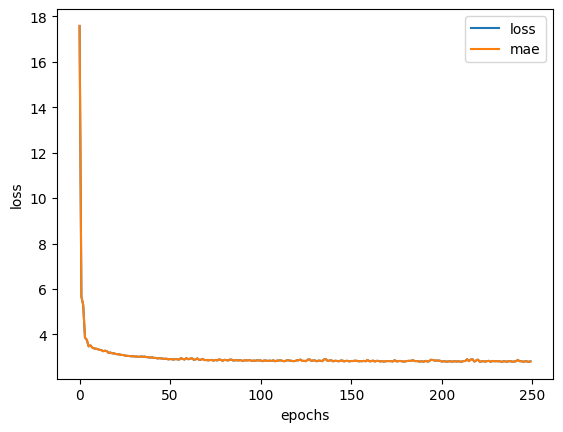

In [120]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 2

In [121]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 200, verbose=0)

In [122]:
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5144 - mae: 4.5144  


[4.550949573516846, 4.550949573516846]

In [123]:
model.summary();

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)                    │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 26)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 17)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 10)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,162 (12.36 KB)

 Trainable params: 3,160 (12.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Text(0.5, 0, 'epochs')

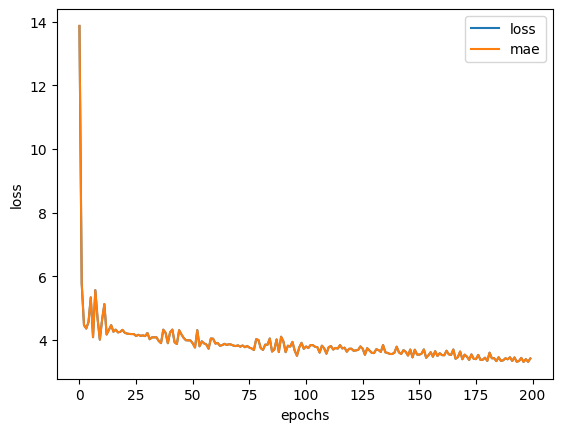

In [124]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 3

In [125]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train1, y_train1, epochs= 150, verbose=0)

In [126]:
model.evaluate(X_test1, y_test1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5160 - mae: 3.5160  


[3.4772801399230957, 3.4772801399230957]

In [127]:
model.summary();

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)                    │ (None, 27)                  │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 17)                  │             442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 15)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,736 (30.22 KB)

 Trainable params: 2,578 (10.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,158 (20.15 KB)

Text(0.5, 0, 'epochs')

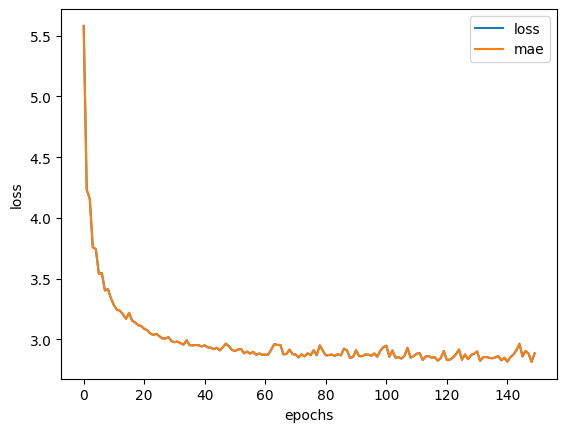

In [128]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# train_test_split(65-35)

## 1

In [129]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(32),

                            tf.keras.layers.Dense(24),

                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 250, verbose=0)

In [130]:
model.evaluate(X_test2, y_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4779 - mae: 3.4779  


[3.4740653038024902, 3.474065065383911]

In [131]:
model.summary();

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (32, 32)                    │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (32, 24)                    │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (32, 18)                    │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (32, 17)                    │             323 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (32, 10)                    │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (32, 1)                     │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,110 (35.59 KB)

 Trainable params: 3,036 (11.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,074 (23.73 KB)

Text(0.5, 0, 'epochs')

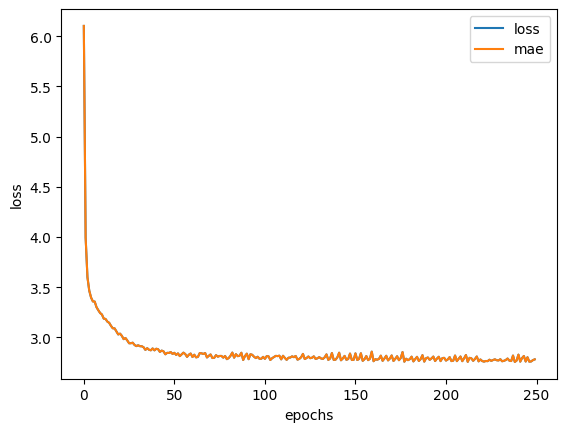

In [132]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 2

In [133]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(33),

                            tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(17),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 150, verbose=0)

In [134]:
model.evaluate(X_test2, y_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5120 - mae: 3.5120  


[3.4893391132354736, 3.4893391132354736]

In [135]:
model.summary();

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (32, 33)                    │           1,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (32, 29)                    │             986 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (32, 27)                    │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (32, 23)                    │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_124 (Dense)                    │ (32, 17)                    │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_125 (Dense)                    │ (32, 1)                     │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,560 (49.07 KB)

 Trainable params: 4,186 (16.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,374 (32.71 KB)

Text(0.5, 0, 'epochs')

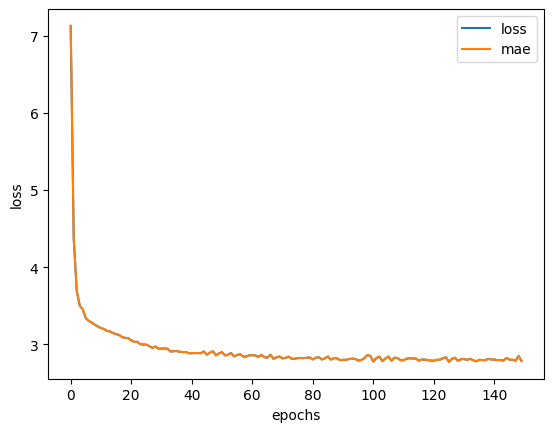

In [136]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 3

In [137]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(34),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train2, y_train2, epochs= 250, verbose=0)

In [138]:
model.evaluate(X_test2, y_test2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4940 - mae: 3.4940  


[3.4839651584625244, 3.4839651584625244]

In [139]:
model.summary();

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)                    │ (32, 34)                    │           1,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_127 (Dense)                    │ (32, 20)                    │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_128 (Dense)                    │ (32, 15)                    │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (32, 10)                    │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (32, 5)                     │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (32, 1)                     │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,790 (30.43 KB)

 Trainable params: 2,596 (10.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,194 (20.29 KB)

Text(0.5, 0, 'epochs')

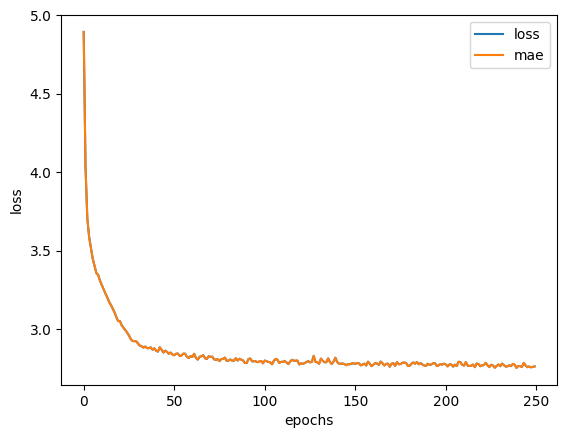

In [140]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# train_test_split(70-30)

## 1

In [141]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(10),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 250, verbose=0)

In [142]:
model.evaluate(X_test3, y_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4208 - mae: 3.4208  


[3.3118603229522705, 3.3118603229522705]

In [143]:
model.summary();

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_132 (Dense)                    │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 20)                  │             580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_135 (Dense)                    │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_136 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_137 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,710 (26.21 KB)

 Trainable params: 2,236 (8.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,474 (17.48 KB)

Text(0.5, 0, 'epochs')

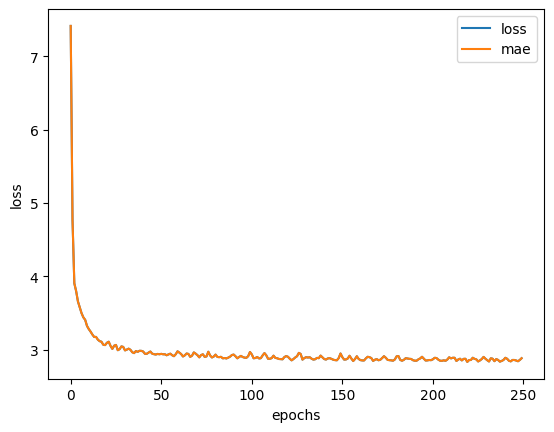

In [144]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 2

In [145]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(19),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 200, verbose=0)

In [146]:
model.evaluate(X_test3, y_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4237 - mae: 3.4237  


[3.318678379058838, 3.318678379058838]

In [147]:
model.summary();

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_138 (Dense)                    │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_139 (Dense)                    │ (None, 27)                  │             783 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_140 (Dense)                    │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_141 (Dense)                    │ (None, 19)                  │             494 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_142 (Dense)                    │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_143 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,241 (40.01 KB)

 Trainable params: 3,413 (13.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,828 (26.68 KB)

Text(0.5, 0, 'epochs')

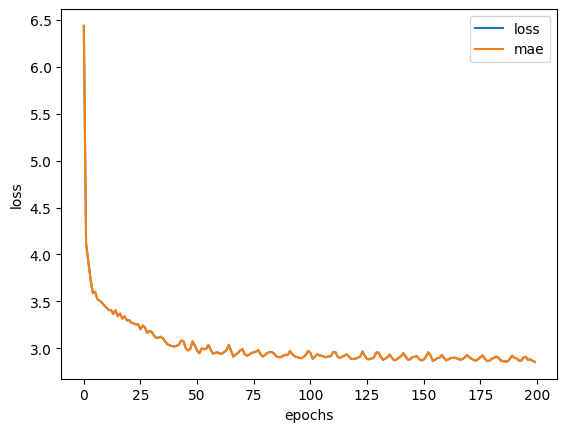

In [148]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### 3

In [149]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(30),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train3, y_train3, epochs= 250, verbose=0)

In [150]:
model.evaluate(X_test3, y_test3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4875 - mae: 3.4875  


[3.368955612182617, 3.368955612182617]

In [151]:
model.summary();

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_144 (Dense)                    │ (None, 30)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_145 (Dense)                    │ (None, 27)                  │             837 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_146 (Dense)                    │ (None, 26)                  │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_147 (Dense)                    │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_148 (Dense)                    │ (None, 20)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_149 (Dense)                    │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,663 (45.56 KB)

 Trainable params: 3,887 (15.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,776 (30.38 KB)

Text(0.5, 0, 'epochs')

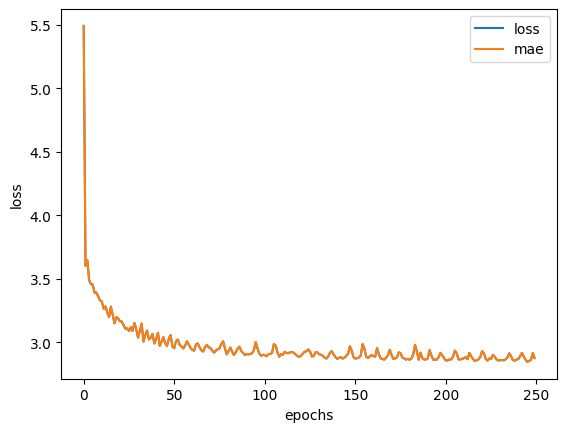

In [152]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# train_test_split(75-25)

## 1

In [153]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(30),

                            tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 200, verbose=0)

In [154]:

model.evaluate(X_test4, y_test4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5139 - mae: 3.5139  


[3.3960044384002686, 3.3960044384002686]

In [155]:
model.summary();

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_150 (Dense)                    │ (None, 30)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_151 (Dense)                    │ (None, 28)                  │             868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_152 (Dense)                    │ (None, 26)                  │             754 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 15)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,459 (44.77 KB)

 Trainable params: 3,819 (14.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,640 (29.85 KB)

Text(0.5, 0, 'epochs')

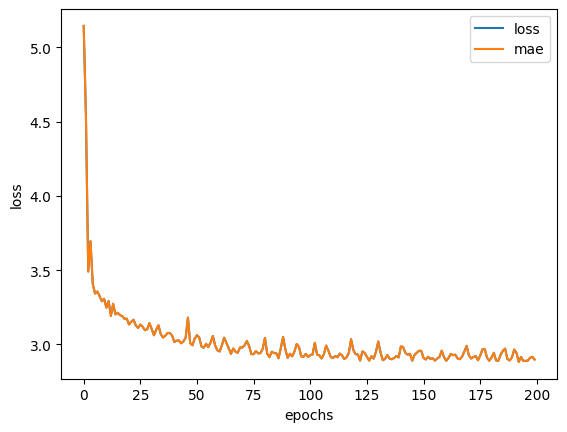

In [156]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 2

In [157]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(16),

                            tf.keras.layers.Dense(5),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 150, verbose=0)

In [158]:

model.evaluate(X_test4, y_test4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5164 - mae: 3.5164  


[3.4063720703125, 3.4063720703125]

In [159]:
model.summary();

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_156 (Dense)                    │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 27)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 18)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_159 (Dense)                    │ (None, 16)                  │             304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 5)                   │              85 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,609 (33.63 KB)

 Trainable params: 2,869 (11.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,740 (22.43 KB)

Text(0.5, 0, 'epochs')

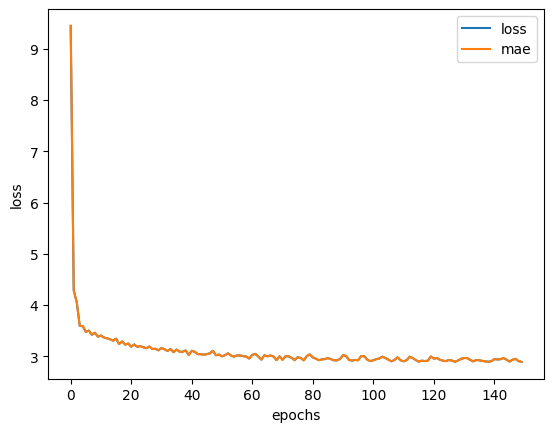

In [160]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 3

In [161]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(24),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train4, y_train4, epochs= 250, verbose=0)

In [162]:

model.evaluate(X_test4, y_test4)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4266 - mae: 3.4266  


[3.3090171813964844, 3.3090171813964844]

In [163]:
model.summary();

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_162 (Dense)                    │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 27)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_164 (Dense)                    │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 24)                  │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,057 (43.20 KB)

 Trainable params: 3,685 (14.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,372 (28.80 KB)

Text(0.5, 0, 'epochs')

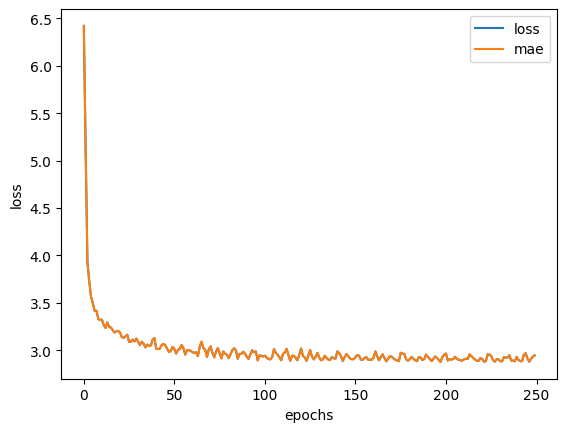

In [164]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## train_test_split(80-20)

## 1

In [165]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(29),

                            tf.keras.layers.Dense(26),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(18),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 200, verbose=0)

In [166]:
model.evaluate(X_test5, y_test5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5756 - mae: 3.5756  


[3.3911843299865723, 3.3911843299865723]

In [167]:
model.summary();

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_168 (Dense)                    │ (None, 29)                  │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_169 (Dense)                    │ (None, 26)                  │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_170 (Dense)                    │ (None, 23)                  │             621 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_171 (Dense)                    │ (None, 18)                  │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_172 (Dense)                    │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_173 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,884 (38.61 KB)

 Trainable params: 3,294 (12.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,590 (25.75 KB)

Text(0.5, 0, 'epochs')

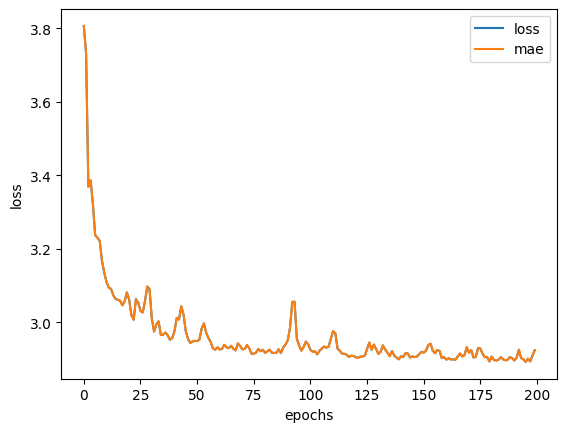

In [168]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 2

In [169]:

tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(25),

                            tf.keras.layers.Dense(20),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 150, verbose=0)

In [170]:
model.evaluate(X_test5, y_test5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6433 - mae: 3.6433  


[3.4572174549102783, 3.4572174549102783]

In [171]:
model.summary();

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_174 (Dense)                    │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_175 (Dense)                    │ (None, 27)                  │             783 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_176 (Dense)                    │ (None, 25)                  │             700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_177 (Dense)                    │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_178 (Dense)                    │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_179 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,364 (40.49 KB)

 Trainable params: 3,454 (13.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,910 (27.00 KB)

Text(0.5, 0, 'epochs')

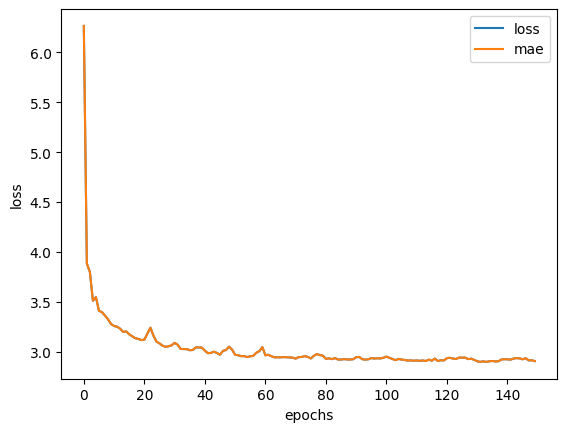

In [172]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 3

In [173]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),

                            tf.keras.layers.Dense(27),

                            tf.keras.layers.Dense(23),

                            tf.keras.layers.Dense(24),

                            tf.keras.layers.Dense(15),

                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer can be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),  #SGD
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(X_train5, y_train5, epochs= 150, verbose=0)

In [174]:
model.evaluate(X_test5, y_test5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6093 - mae: 3.6093  


[3.42726469039917, 3.42726469039917]

In [175]:
model.summary();

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_180 (Dense)                    │ (None, 28)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ (None, 27)                  │             783 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ (None, 23)                  │             644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 24)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 15)                  │             375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,544 (41.19 KB)

 Trainable params: 3,514 (13.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,030 (27.46 KB)

Text(0.5, 0, 'epochs')

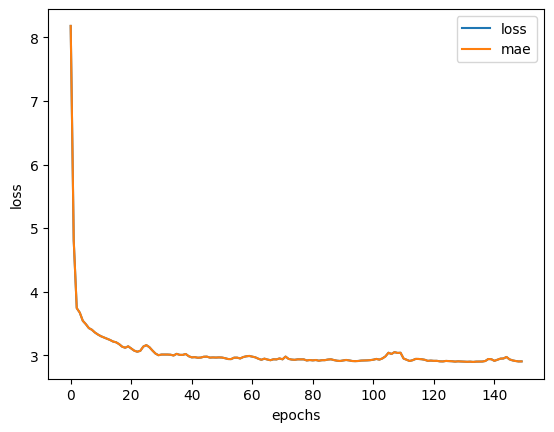

In [176]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")